In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

AIM:

    In this Project,On the basis of the mobile Specification like Battery power, 3G enabled , wifi ,Bluetooth, Ram etc we are predicting Price range of the mobile

    In this data:
        id:ID
        battery_power:Total energy a battery can store in one time measured in mAh
        blue:Has bluetooth or not
        clock_speed:speed at which microprocessor executes instructions
        dual_sim:Has dual sim support or not
        fc:Front Camera mega pixels
        four_g:Has 4G or not
        int_memory:Internal Memory in Gigabytes
        m_dep:Mobile Depth in cm
        mobile_wt:Weight of mobile phone
        n_cores:Number of cores of processor
        pc:Primary Camera mega pixels
        px_height:Pixel Resolution Height
        px_width:Pixel Resolution Width
        ram:Random Access Memory in Megabytes
        sc_h:Screen Height of mobile in cm
        sc_w:Screen Width of mobile in cm
        talk_time:longest time that a single battery charge will last when you are
        three_g:Has 3G or not
        touch_screen:Has touch screen or not
        wifi:Has wifi or not

USE:

    This kind of prediction will help companies estimate price of mobiles to give tough competion to other mobile manufacturer
    Also it will be usefull for Consumers to verify that they are paying best price for a mobile.


Applied Models:

    Logistic Regression(MultiClass Classification)
    KNN
    Decision tree
    Random forest


Predicting the price range of a mobile phone based solely on its specifications like battery power, 3G/4G capability, Wi-Fi, Bluetooth, RAM, and other hardware features
how these specifications can influence the price range of a mobile phone:

    Battery Power: A phone with a larger battery capacity (measured in milliampere-hours, mAh) generally tends to be more expensive, especially if it offers fast charging or wireless charging features.

    Network Connectivity (3G/4G/5G): 5G-enabled phones tend to be more expensive than 4G or 3G phones due to the newer technology and increased data speeds.

    Wi-Fi and Bluetooth: The presence of the latest Wi-Fi and Bluetooth standards (e.g., Wi-Fi 6, Bluetooth 5.0) may slightly increase the price, but this is often a minor factor.

    RAM: Phones with higher RAM capacity are typically more expensive because they can handle multitasking and memory-intensive applications better.

    Storage: The amount of internal storage (e.g., 64GB, 128GB, 256GB) significantly affects the price. More storage usually means a higher price.

    Processor: The CPU (Central Processing Unit) or SoC (System on a Chip) plays a crucial role in pricing. High-end processors are more expensive, but they provide better performance.

    Camera Quality: The quality and features of the camera system (e.g., number of lenses, megapixels, image stabilization) can significantly impact the price.


In [ ]:
data=pd.read_csv('datasets_11167_15520_train.csv')

pd.set_option('display.max.columns',None)
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
data.columns.size

21

## Basic Checks

In [ ]:
data.shape

(2000, 21)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
#numerical Describtion
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
data.describe().columns.size  #columns size same so no categorical data exist

21

In [ ]:
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [ ]:
data.duplicated().sum()

0

In [ ]:
#Handle the minimum values for the columns sc_w and px_height
data.sc_w.min()
data.px_height.min()

0

## EDA

In [ ]:
#Univariate Analysis
import sweetviz as sv

In [ ]:

my_report = sv.analyze(data)
my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"


/Users/hashim/anaconda3/envs/anoconda_env/lib/python3.11/site-packages/sweetviz/dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
/Users/hashim/anaconda3/envs/anoconda_env/lib/python3.11/site-packages/sweetviz/dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()


                                             |          | [  0%]   00:00 -> (? left)

/Users/hashim/anaconda3/envs/anoconda_env/lib/python3.11/site-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
/Users/hashim/anaconda3/envs/anoconda_env/lib/python3.11/site-packages/sweetviz/series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in category_counts.iteritems():
/Users/hashim/anaconda3/envs/anoconda_env/lib/python3.11/site-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
/Users/hashim/anaconda3/envs/anoconda_env/lib/python3.11/site-packages/sweetviz/series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and 

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
#Bivariante Analysis

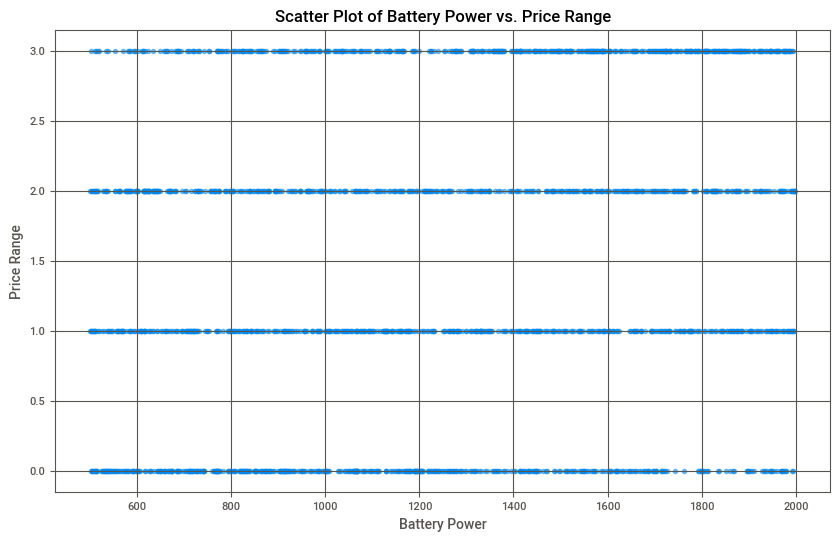

In [ ]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data['battery_power'], data['price_range'], alpha=0.5)
plt.title('Scatter Plot of Battery Power vs. Price Range')
plt.xlabel('Battery Power')
plt.ylabel('Price Range')
plt.grid(True)
plt.show()

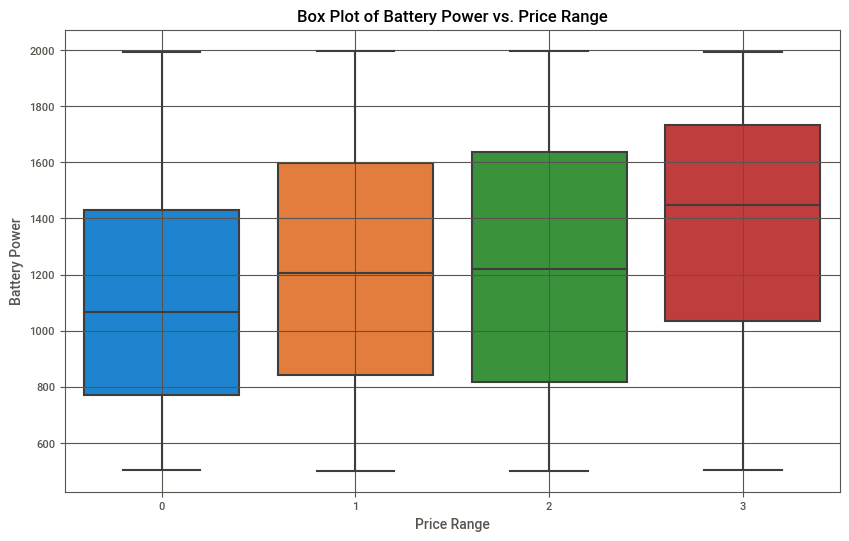

In [ ]:
# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='price_range', y='battery_power', data=data)
plt.title('Box Plot of Battery Power vs. Price Range')
plt.xlabel('Price Range')
plt.ylabel('Battery Power')
plt.grid(True)
plt.show()

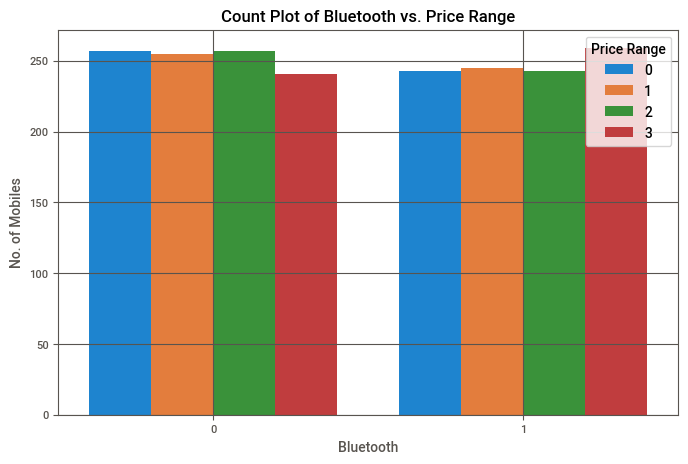

In [ ]:
# Create a count plot
plt.figure(figsize=(8, 5))
sns.countplot(x='blue', hue='price_range', data=data)
plt.title('Count Plot of Bluetooth vs. Price Range')
plt.xlabel('Bluetooth')
plt.ylabel('No. of Mobiles')
plt.legend(title='Price Range', loc='upper right', labels=['0', '1', '2', '3'])
plt.grid(True)
plt.show()

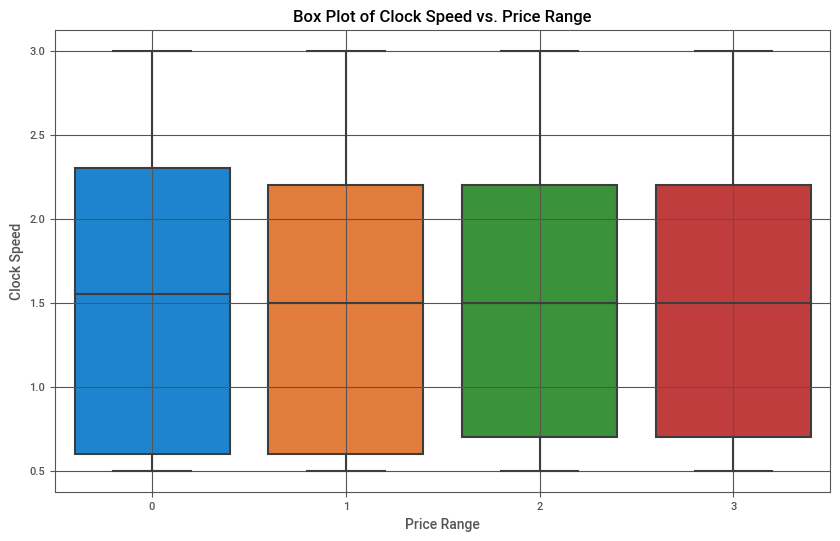

In [ ]:
# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='price_range', y='clock_speed', data=data)
plt.title('Box Plot of Clock Speed vs. Price Range')
plt.xlabel('Price Range')
plt.ylabel('Clock Speed')
plt.grid(True)
plt.show()

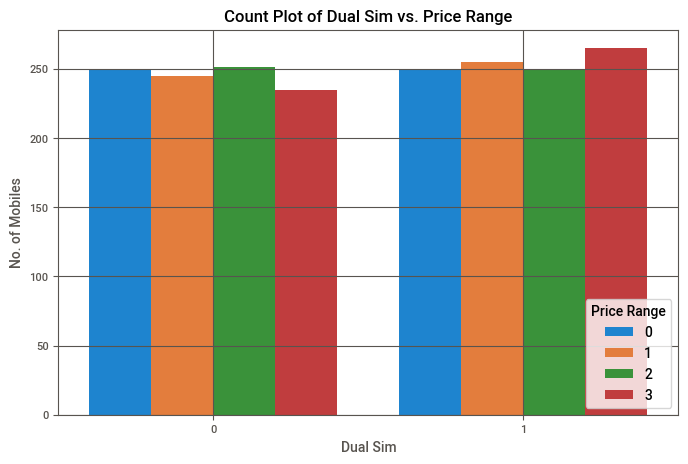

In [ ]:
# Create a count plot
plt.figure(figsize=(8, 5))
sns.countplot(x='dual_sim', hue='price_range', data=data)
plt.title('Count Plot of Dual Sim vs. Price Range')
plt.xlabel('Dual Sim')
plt.ylabel('No. of Mobiles')
plt.legend(title='Price Range', loc='lower right', labels=['0', '1', '2', '3'])
plt.grid(True)
plt.show()

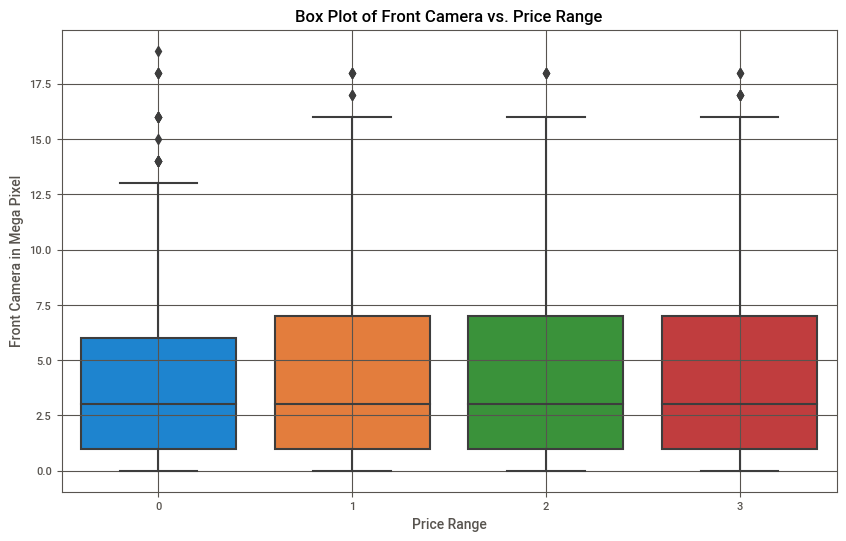

In [ ]:
# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='price_range', y='fc', data=data)
plt.title('Box Plot of Front Camera vs. Price Range')
plt.xlabel('Price Range')
plt.ylabel('Front Camera in Mega Pixel')
plt.grid(True)
plt.show()

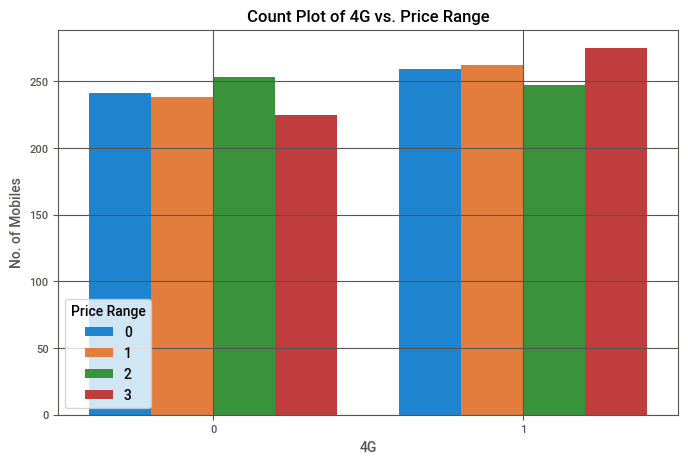

In [ ]:
# Create a count plot
plt.figure(figsize=(8, 5))
sns.countplot(x='four_g', hue='price_range', data=data)
plt.title('Count Plot of 4G vs. Price Range')
plt.xlabel('4G')
plt.ylabel('No. of Mobiles')
plt.legend(title='Price Range', loc='lower left', labels=['0', '1', '2', '3'])
plt.grid(True)
plt.show()

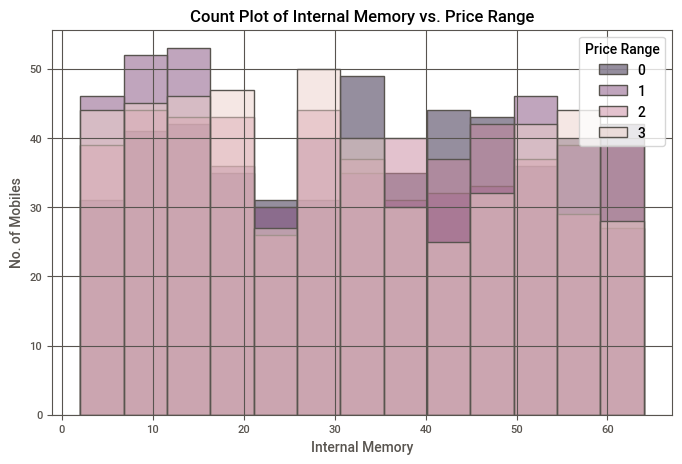

In [ ]:
# Create a Hist plot
plt.figure(figsize=(8, 5))
sns.histplot(x='int_memory', hue='price_range', data=data)
plt.title('Count Plot of Internal Memory vs. Price Range')
plt.xlabel('Internal Memory')
plt.ylabel('No. of Mobiles')
plt.legend(title='Price Range', loc='upper right', labels=['0', '1', '2', '3'])
plt.grid(True)
plt.show()

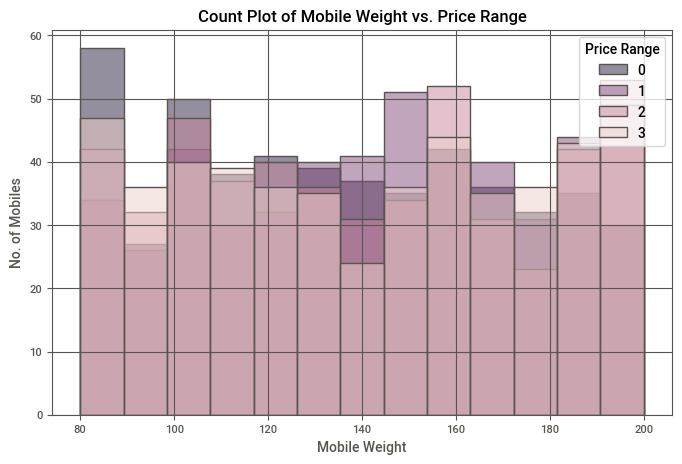

In [ ]:
# Create a count plot
plt.figure(figsize=(8, 5))
sns.histplot(x='mobile_wt', hue='price_range', data=data)
plt.title('Count Plot of Mobile Weight vs. Price Range')
plt.xlabel('Mobile Weight')
plt.ylabel('No. of Mobiles')
plt.legend(title='Price Range', loc='upper right', labels=['0', '1', '2', '3'])
plt.grid(True)
plt.show()

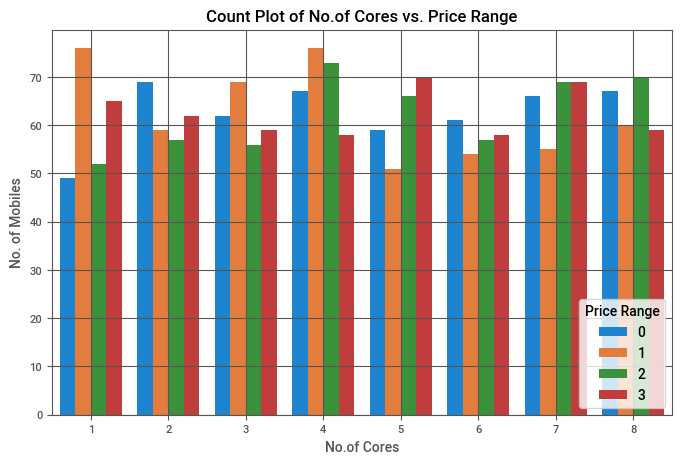

In [ ]:
# Create a count plot
plt.figure(figsize=(8, 5))
sns.countplot(x='n_cores', hue='price_range', data=data)
plt.title('Count Plot of No.of Cores vs. Price Range')
plt.xlabel('No.of Cores')
plt.ylabel('No. of Mobiles')
plt.legend(title='Price Range', loc='lower right', labels=['0', '1', '2', '3'])
plt.grid(True)
plt.show()

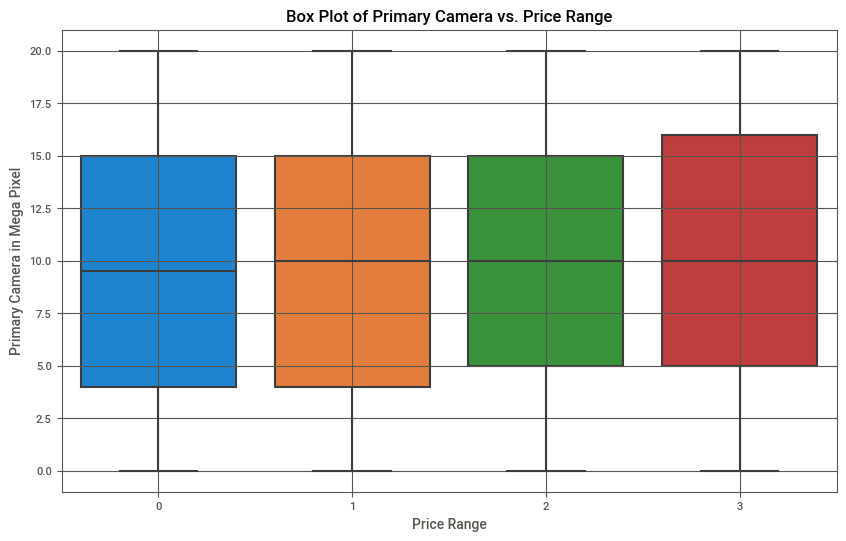

In [ ]:
# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='price_range', y='pc', data=data)
plt.title('Box Plot of Primary Camera vs. Price Range')
plt.xlabel('Price Range')
plt.ylabel('Primary Camera in Mega Pixel')
plt.grid(True)
plt.show()

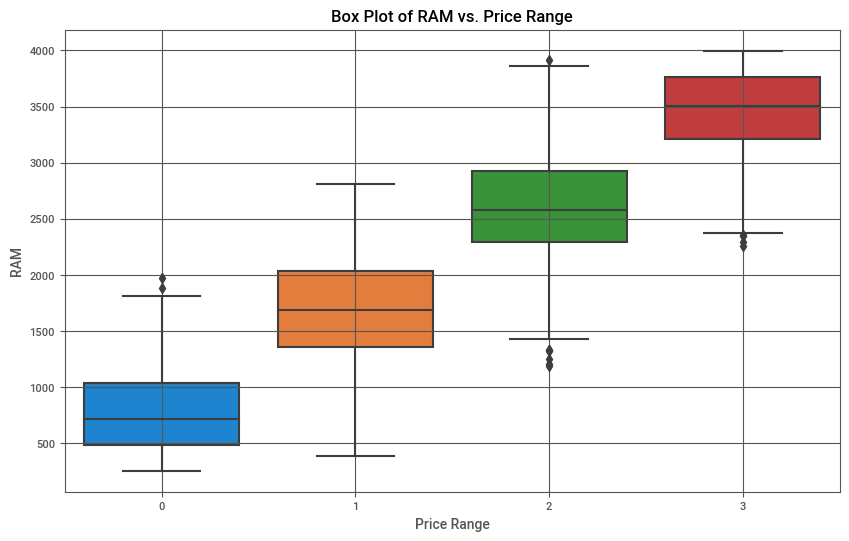

In [ ]:
# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='price_range', y='ram', data=data)
plt.title('Box Plot of RAM vs. Price Range')
plt.xlabel('Price Range')
plt.ylabel('RAM')
plt.grid(True)
plt.show()

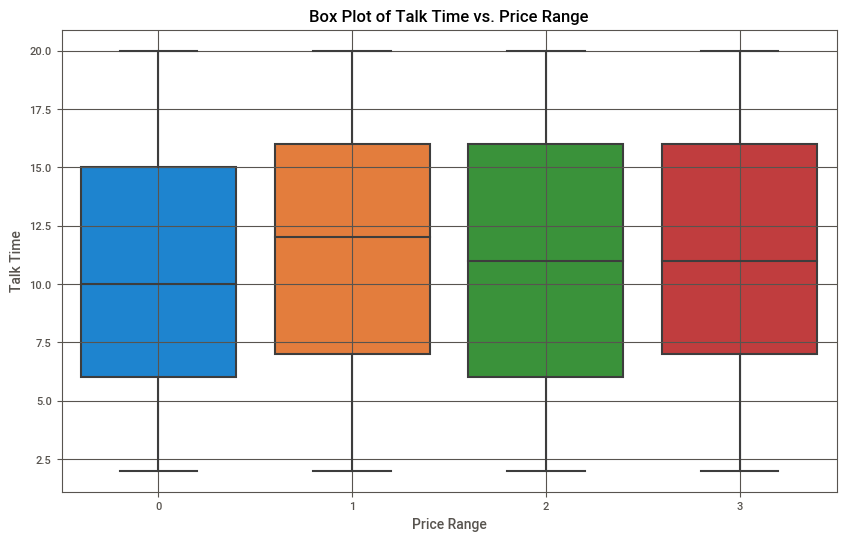

In [ ]:
# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='price_range', y='talk_time', data=data)
plt.title('Box Plot of Talk Time vs. Price Range')
plt.xlabel('Price Range')
plt.ylabel('Talk Time')
plt.grid(True)
plt.show()

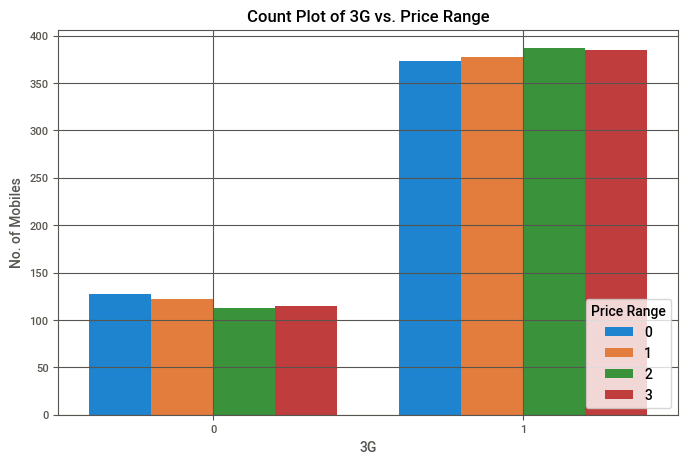

In [ ]:
# Create a count plot
plt.figure(figsize=(8, 5))
sns.countplot(x='three_g', hue='price_range', data=data)
plt.title('Count Plot of 3G vs. Price Range')
plt.xlabel('3G')
plt.ylabel('No. of Mobiles')
plt.legend(title='Price Range', loc='lower right', labels=['0', '1', '2', '3'])
plt.grid(True)
plt.show()

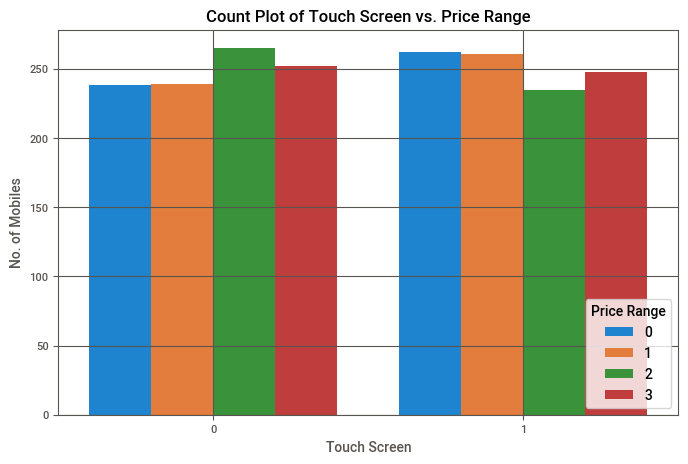

In [ ]:
# Create a count plot
plt.figure(figsize=(8, 5))
sns.countplot(x='touch_screen', hue='price_range', data=data)
plt.title('Count Plot of Touch Screen vs. Price Range')
plt.xlabel('Touch Screen')
plt.ylabel('No. of Mobiles')
plt.legend(title='Price Range', loc='lower right', labels=['0', '1', '2', '3'])
plt.grid(True)
plt.show()

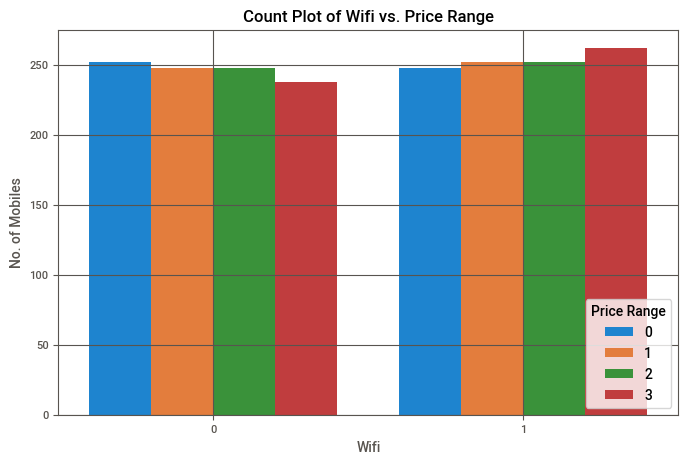

In [ ]:
# Create a count plot
plt.figure(figsize=(8, 5))
sns.countplot(x='wifi', hue='price_range', data=data)
plt.title('Count Plot of Wifi vs. Price Range')
plt.xlabel('Wifi')
plt.ylabel('No. of Mobiles')
plt.legend(title='Price Range', loc='lower right', labels=['0', '1', '2', '3'])
plt.grid(True)
plt.show()

<Axes: xlabel='battery_power', ylabel='ram'>

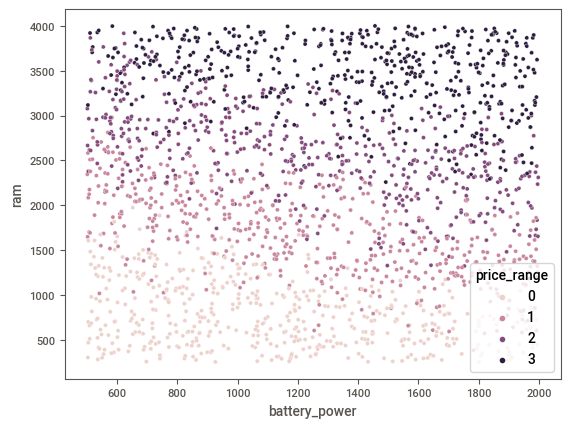

In [ ]:
sns.scatterplot(x=data['battery_power'],y=data['ram'],hue=data['price_range'])

<Axes: xlabel='int_memory', ylabel='ram'>

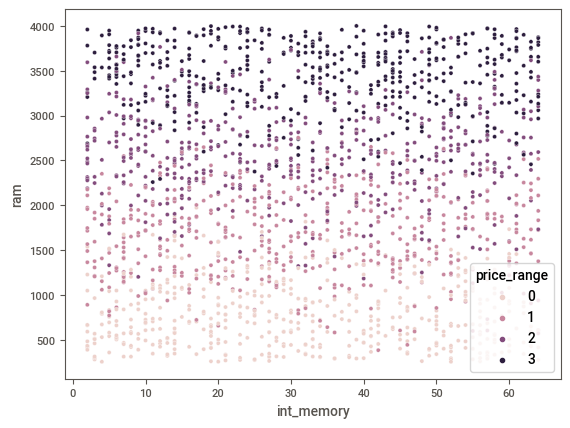

In [ ]:
sns.scatterplot(x=data['int_memory'],y=data['ram'],hue=data['price_range'])

<Axes: xlabel='battery_power', ylabel='talk_time'>

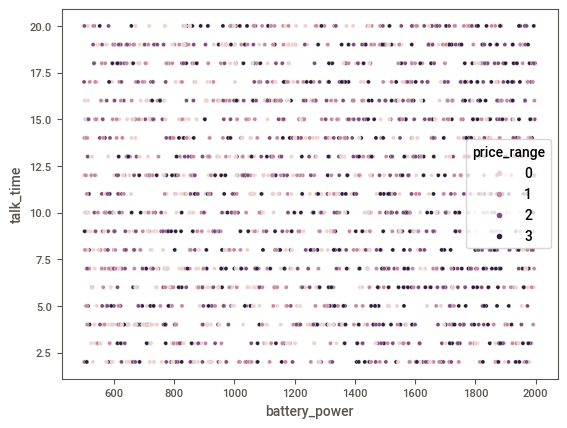

In [ ]:
sns.scatterplot(x=data['battery_power'],y=data['talk_time'],hue=data['price_range'])

<Axes: xlabel='px_height', ylabel='px_width'>

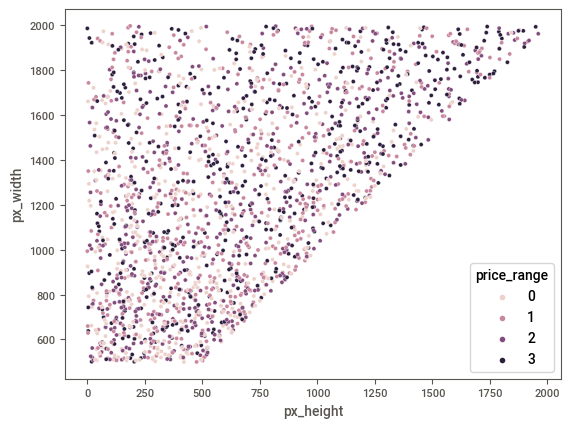

In [ ]:
sns.scatterplot(x=data['px_height'],y=data['px_width'],hue=data['price_range'])

<Axes: xlabel='sc_h', ylabel='sc_w'>

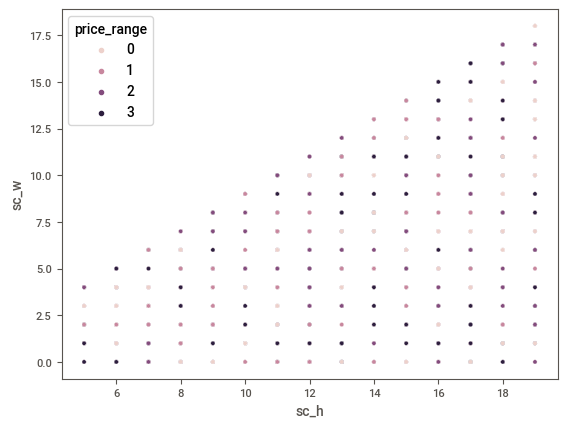

In [ ]:
sns.scatterplot(x=data['sc_h'],y=data['sc_w'],hue=data['price_range'])

<b>The pricing range is significantly higher for mobile phones with certain features like Dual SIM, 4G capability, PC (Primary Camera), RAM, 3G capability, and Wi-Fi,Battery Power.</b>




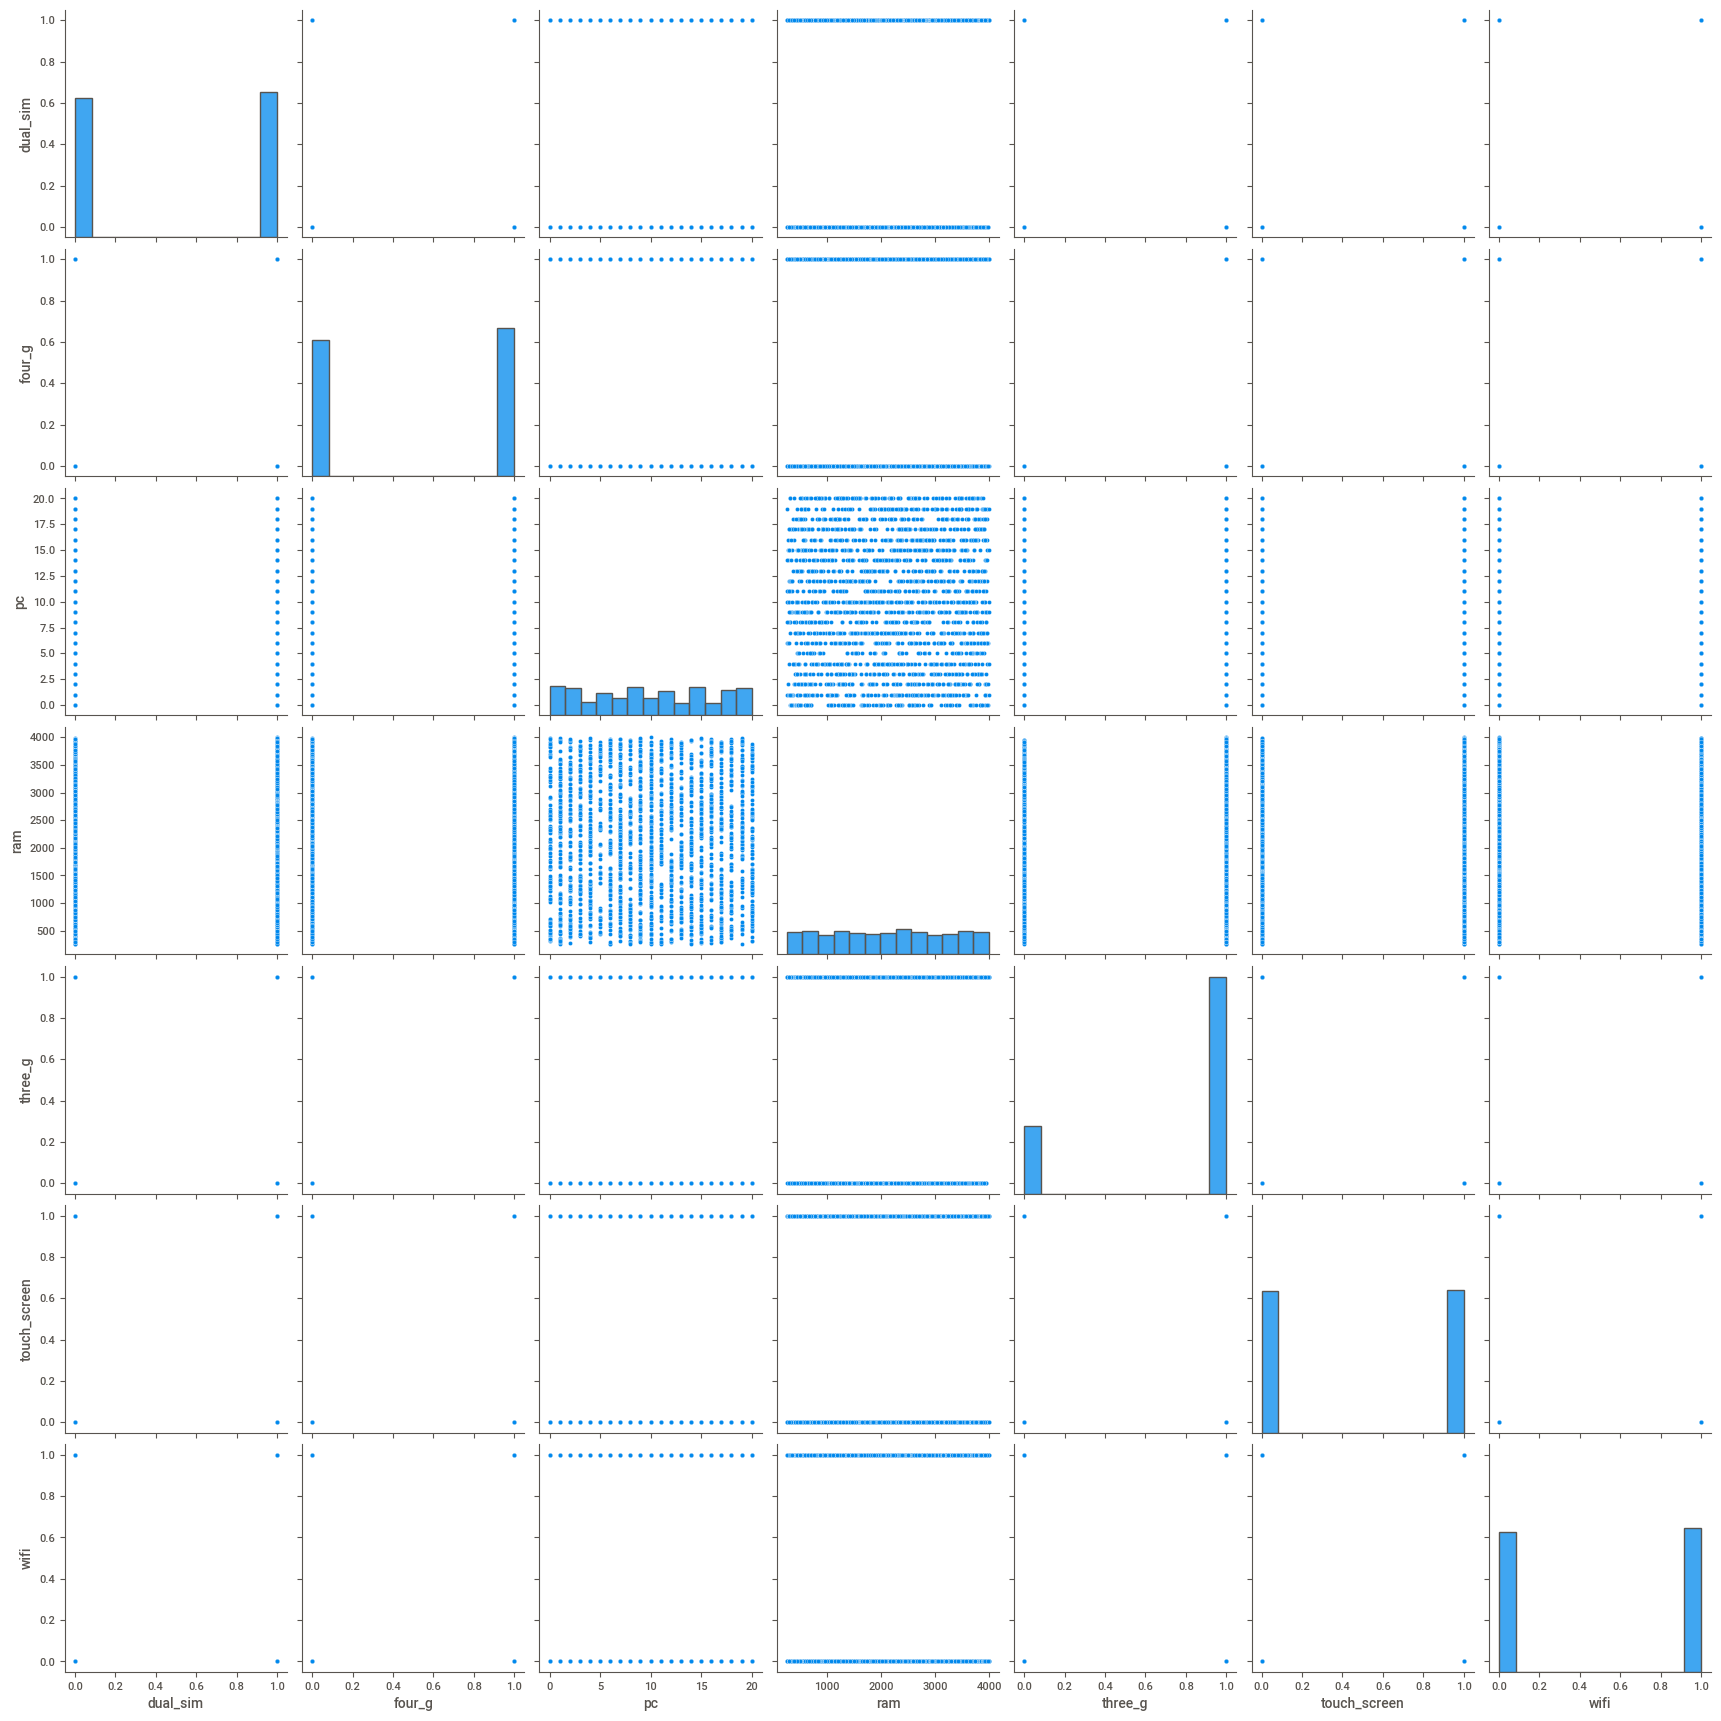

In [ ]:
#Multivariant Analysis
sns.pairplot(data[['dual_sim','four_g','pc','ram','three_g','touch_screen','wifi']])

## Feature Selection

<Axes: >

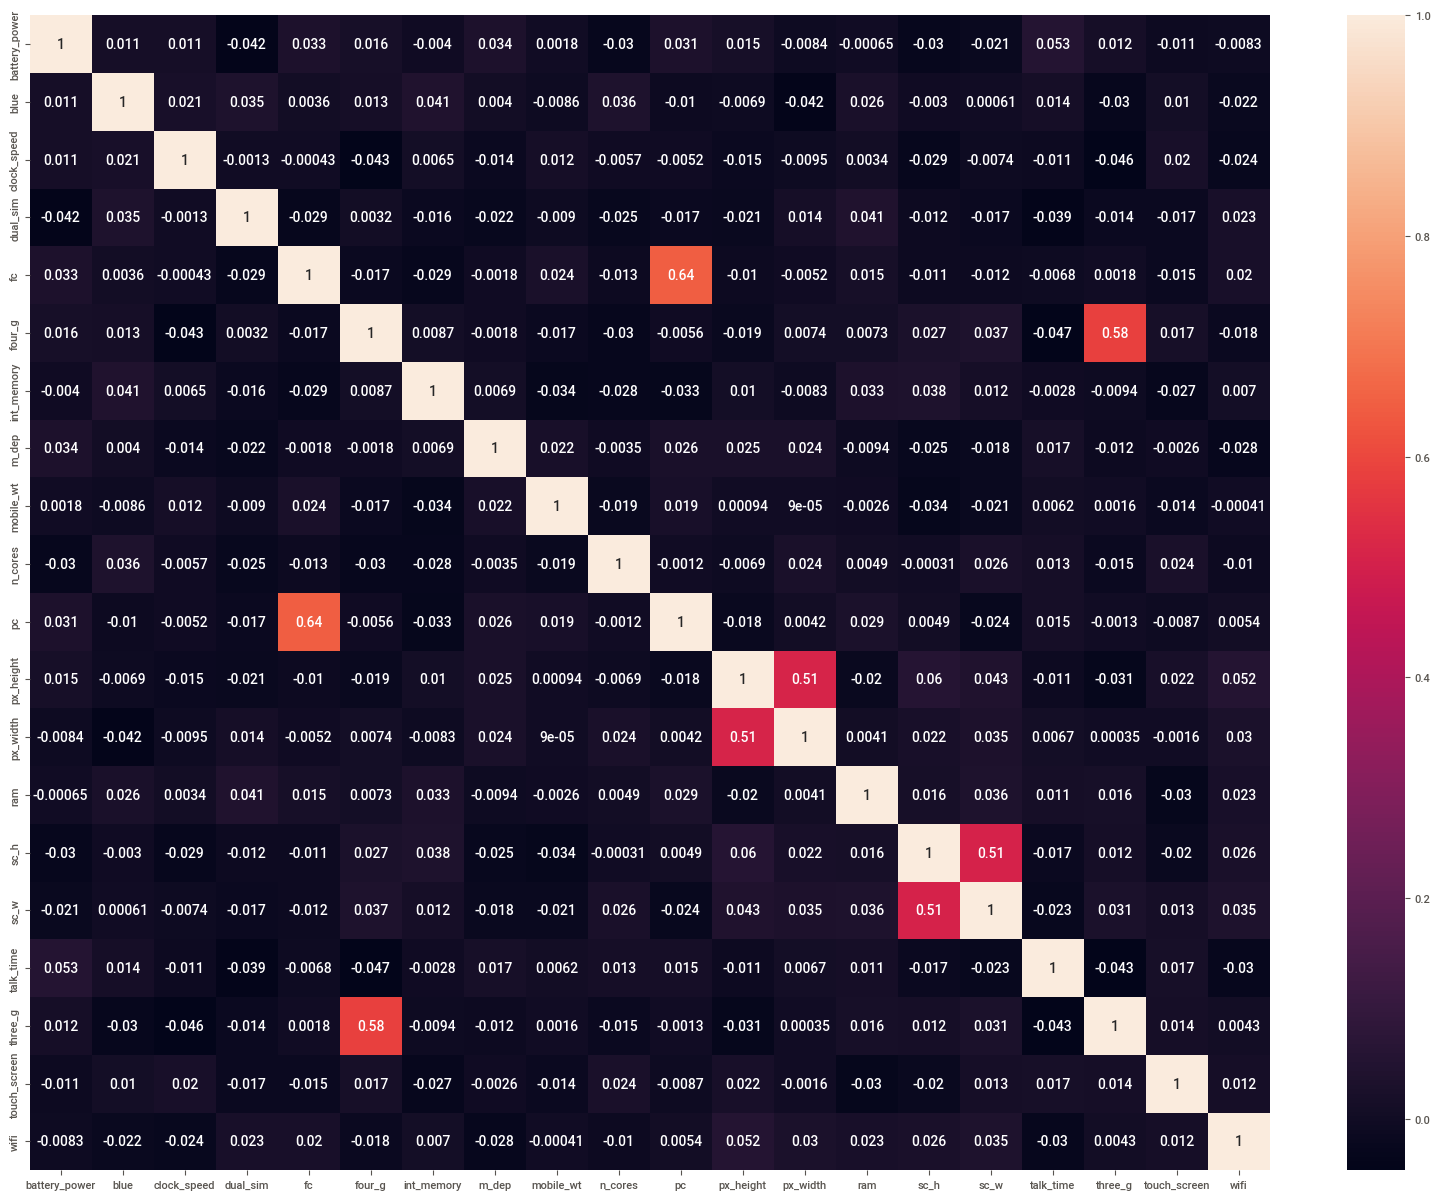

In [ ]:
plt.figure(figsize=[20,15])
sns.heatmap(data.drop('price_range',axis=1).corr(),annot=True)

There is no highly correlated feature exist

## Data Preprocessing

#Handling Corrupt data and null values

In [ ]:
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

<b>There is no null value exist in the dataset</b>

#Handlign Corrupt Values

In [ ]:
#Handle the minimum value is 0 for the columns sc_w and px_height
data.sc_w.min()
data.px_height.min()

0

In [ ]:
data.loc[data['sc_w']==0,'sc_w']=data.sc_w.mean()


In [ ]:
data.loc[data['px_height']==0,'px_height']=data.px_height.mean()

# Handling Outliers


In [ ]:
# Create a list of continuous column names
continuous_columns = [
    'battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
    'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram',
    'sc_h', 'sc_w', 'talk_time'
]

# Create a new DataFrame with only the continuous columns
continuous_data = data[continuous_columns]

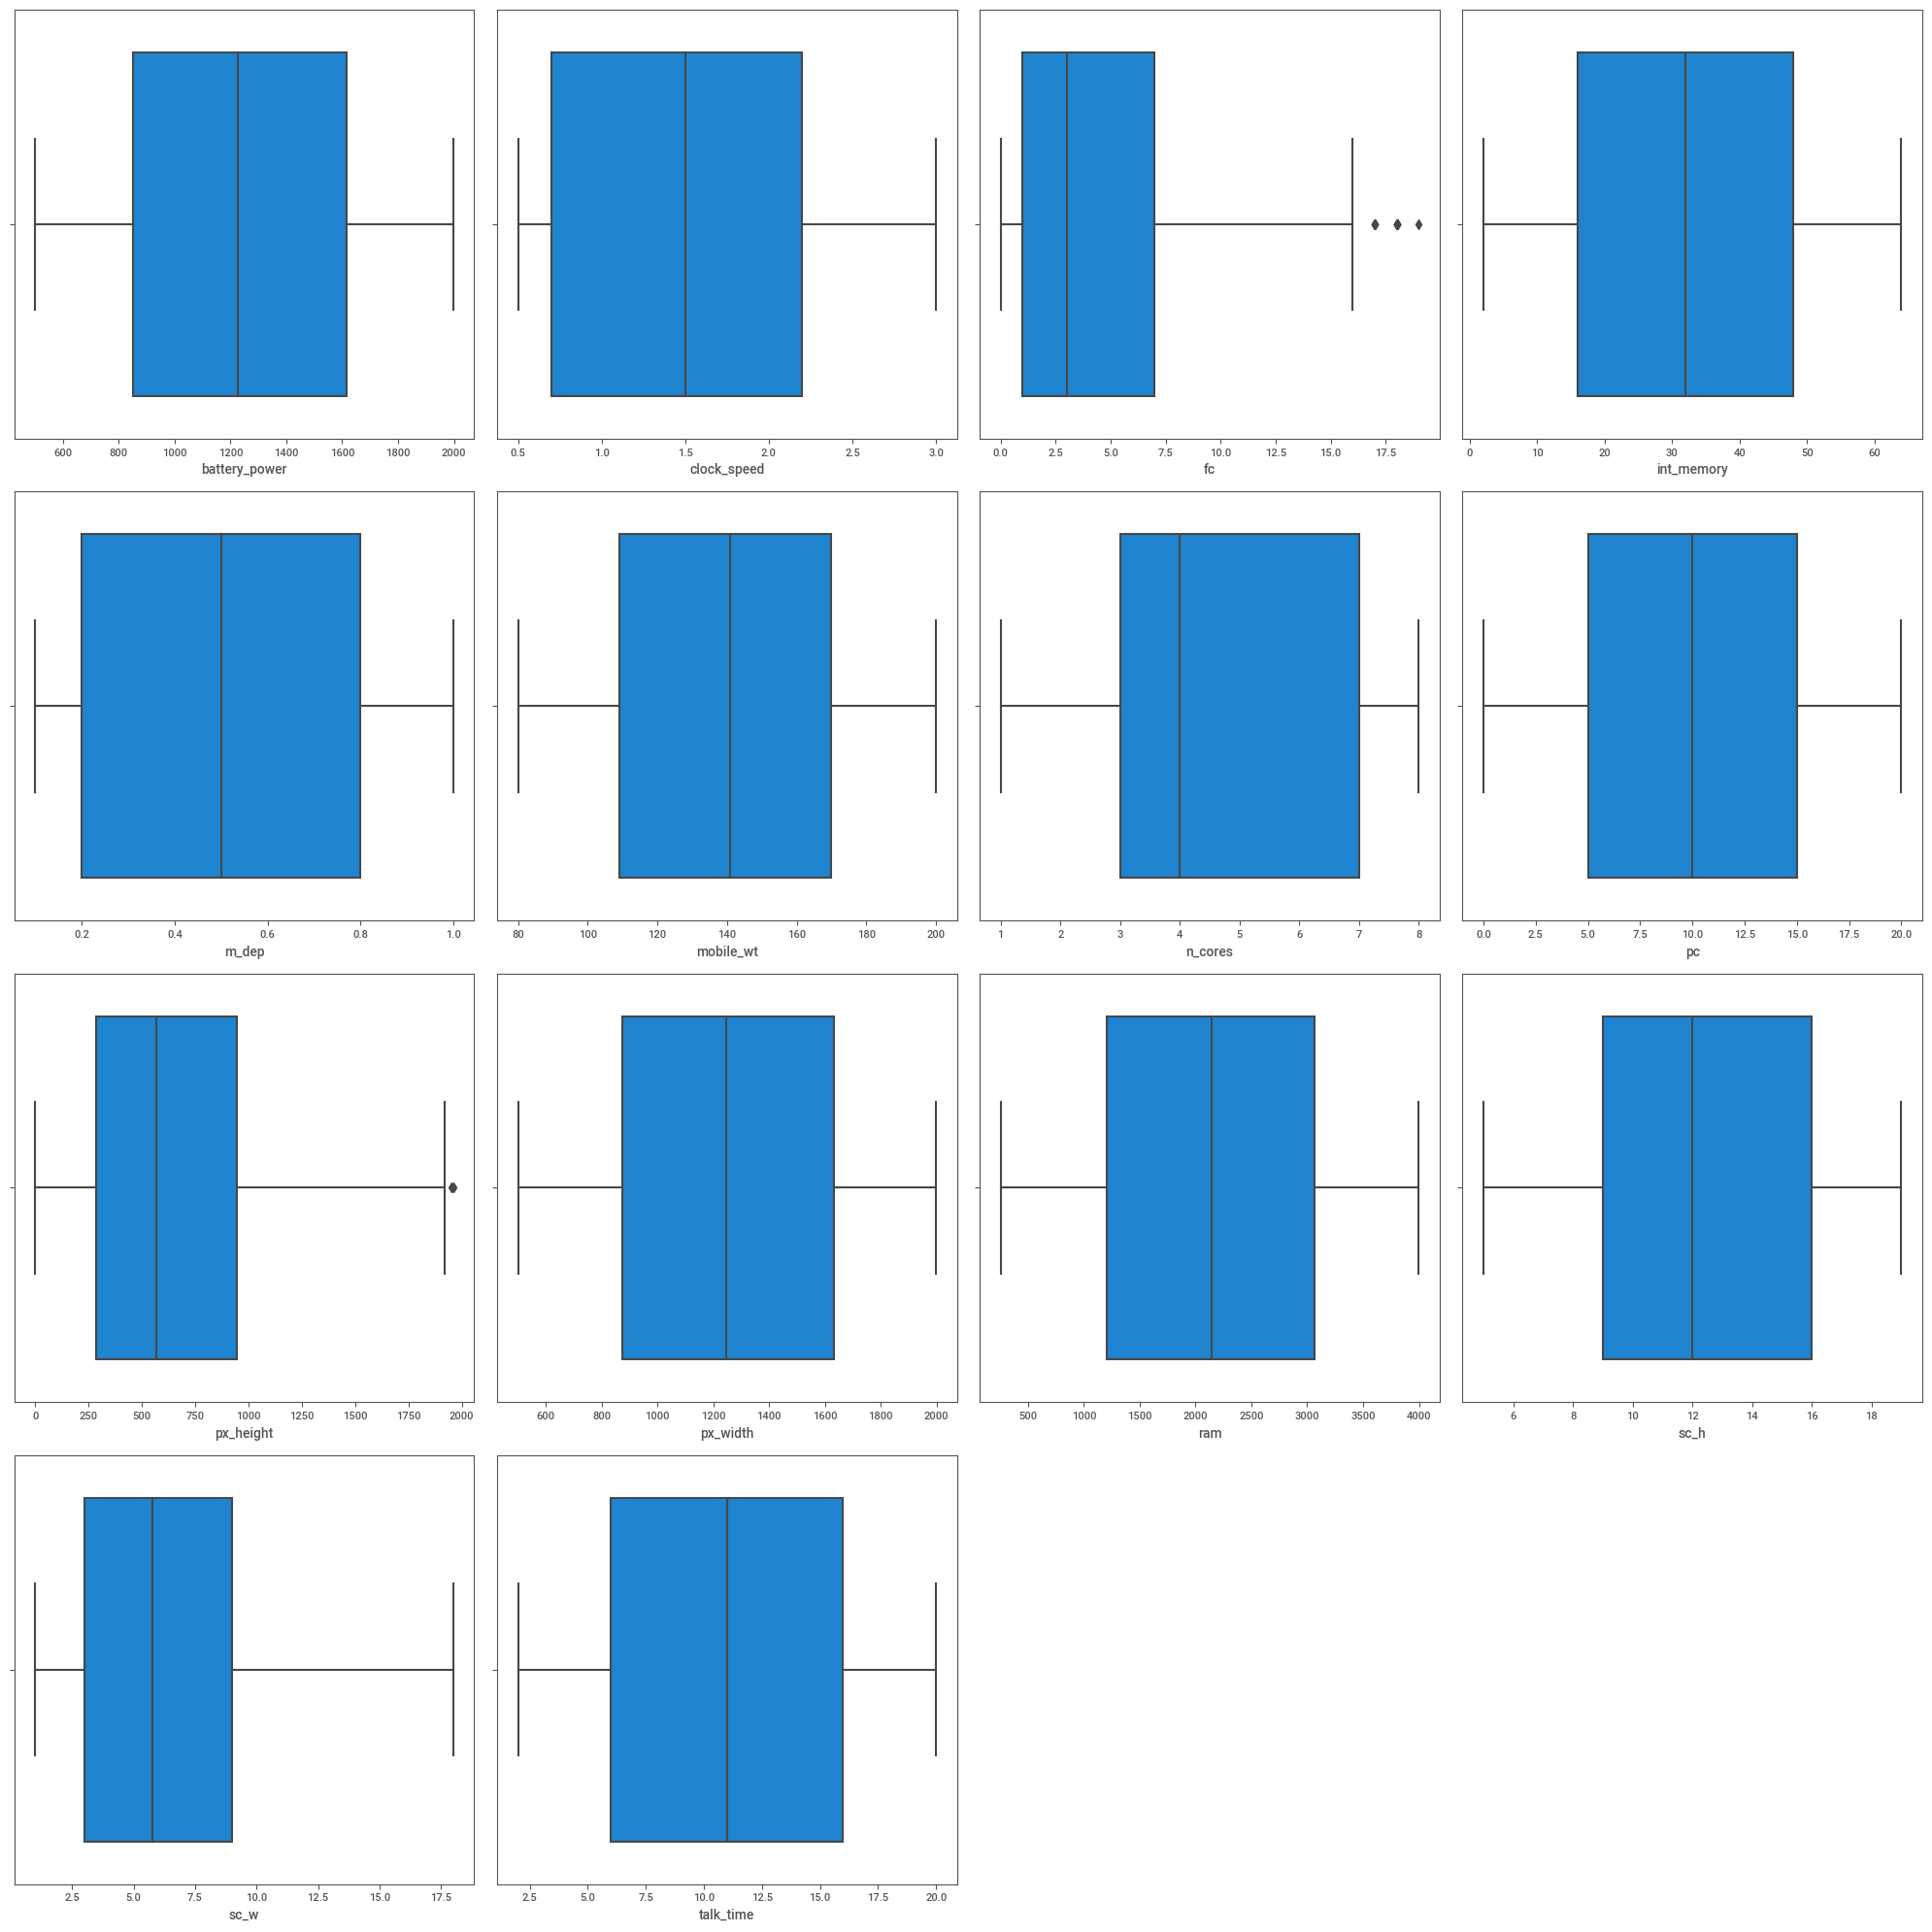

In [ ]:
plt.figure(figsize=(20,20))
num=1
for column in continuous_data:
    plt.subplot(4,4,num)
    sns.boxplot(x=continuous_data[column])
    num=num+1

plt.tight_layout()
plt.show()


<Axes: xlabel='fc', ylabel='Count'>

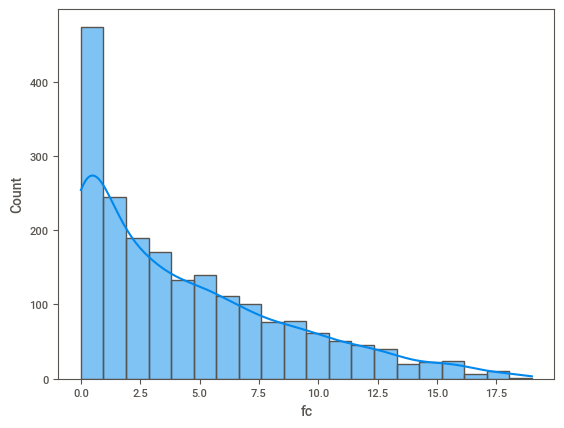

In [ ]:
#handling fc outliers
sns.histplot(x=data['fc'],kde=True)

In [ ]:
Q1=data['fc'].quantile(0.25)
Q3=data['fc'].quantile(0.75)
IQR=Q3-Q1
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR
print("IQR  ",IQR)
print("Lower  ",lower)
print("Upper  ",upper)
print("Outliers Percentage",len(data.loc[(data['fc']<lower)|(data['fc']>upper)])/len(data))

IQR   6.0
Lower   -8.0
Upper   16.0
Outliers Percentage 0.009


## Balancing the Data

In [ ]:
class_counts = data['price_range'].value_counts()

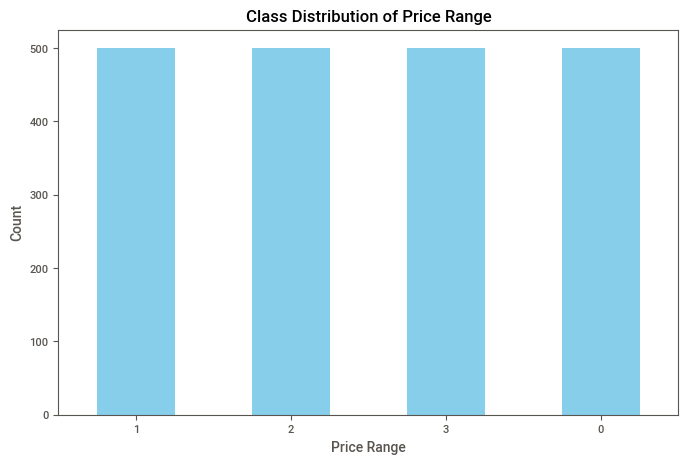

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64


In [ ]:
# Create a bar plot to visualize the class distribution
plt.figure(figsize=(8, 5))
class_counts.plot(kind='bar', color='skyblue')
plt.title('Class Distribution of Price Range')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Display the counts
print(class_counts)


In [ ]:
x = data.drop(['price_range'],axis = 1)
y = data['price_range']


In [ ]:
x

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20.0,756,2549,9,7.0,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905.0,1988,2631,17,3.0,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263.0,1716,2603,11,2.0,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216.0,1786,2769,16,8.0,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208.0,1212,1411,8,2.0,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222.0,1890,668,13,4.0,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915.0,1965,2032,11,10.0,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868.0,1632,3057,9,1.0,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336.0,670,869,18,10.0,19,1,1,1


In [ ]:
continuous_columns

['battery_power',
 'clock_speed',
 'fc',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time']

In [ ]:
data[continuous_columns]

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,842,2.2,1,7,0.6,188,2,2,20.0,756,2549,9,7.0,19
1,1021,0.5,0,53,0.7,136,3,6,905.0,1988,2631,17,3.0,7
2,563,0.5,2,41,0.9,145,5,6,1263.0,1716,2603,11,2.0,9
3,615,2.5,0,10,0.8,131,6,9,1216.0,1786,2769,16,8.0,11
4,1821,1.2,13,44,0.6,141,2,14,1208.0,1212,1411,8,2.0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,0.5,0,2,0.8,106,6,14,1222.0,1890,668,13,4.0,19
1996,1965,2.6,0,39,0.2,187,4,3,915.0,1965,2032,11,10.0,16
1997,1911,0.9,1,36,0.7,108,8,3,868.0,1632,3057,9,1.0,5
1998,1512,0.9,4,46,0.1,145,5,5,336.0,670,869,18,10.0,19


In [ ]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
data[continuous_columns]=scale.fit_transform(data[continuous_columns])

In [ ]:
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,-0.902597,0,0.830779,0,-0.762495,0,-1.380644,0.340740,1.349249,-1.101971,-1.305750,-1.411897,-1.146784,0.391703,-0.784983,0.180155,1.462493,0,0,1,1
1,-0.495139,1,-1.253064,1,-0.992890,1,1.155024,0.687548,-0.120059,-0.664768,-0.645989,0.584943,1.704465,0.467317,1.114266,-0.829159,-0.734267,1,1,0,2
2,-1.537686,1,-1.253064,1,-0.532099,1,0.493546,1.381165,0.134244,0.209639,-0.645989,1.392705,1.074968,0.441498,-0.310171,-1.081487,-0.368140,1,1,0,2
3,-1.419319,1,1.198517,0,-0.992890,0,-1.215274,1.034357,-0.261339,0.646842,-0.151168,1.286658,1.236971,0.594569,0.876859,0.432483,-0.002014,1,0,0,2
4,1.325906,1,-0.395011,0,2.002254,1,0.658915,0.340740,0.021220,-1.101971,0.673534,1.268607,-0.091452,-0.657666,-1.022389,-1.081487,0.730240,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-1.011860,1,-1.253064,1,-0.992890,1,-1.656260,1.034357,-0.967737,0.646842,0.673534,1.300196,1.477661,-1.342799,0.164641,-0.576830,1.462493,1,1,0,0
1996,1.653694,1,1.321096,1,-0.992890,0,0.383299,-1.046495,1.320993,-0.227564,-1.140810,0.607506,1.651235,-0.085031,-0.310171,0.937140,0.913303,1,1,1,2
1997,1.530773,0,-0.762748,1,-0.762495,1,0.217930,0.687548,-0.911225,1.521249,-1.140810,0.501459,0.880565,0.860139,-0.784983,-1.333816,-1.100394,1,1,0,3
1998,0.622527,0,-0.762748,0,-0.071307,1,0.769162,-1.393304,0.134244,0.209639,-0.810929,-0.698901,-1.345816,-1.157454,1.351672,0.937140,1.462493,1,1,1,0


In [ ]:
data.to_csv('dataset_v2.csv')

In [ ]:
x = data.drop(['price_range'],axis = 1)
y = data['price_range']

In [ ]:
# Splitting dataset into train and test sets

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

## Logistic Regression MultiClass Classification Algorithm

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_model_with_hyper=LogisticRegression(max_iter=1000, multi_class='ovr', solver='lbfgs', random_state=42)  #specified hyperparameters and train them on the training data

logistic_model_with_hyper.fit(x_train,y_train)

LogisticRegression(max_iter=1000, multi_class='ovr', random_state=42)

In [ ]:

y_predict_logistic_with_hyper=logistic_model_with_hyper.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,f1_score,classification_report,precision_score,recall_score,confusion_matrix

In [ ]:

accuracy_logistic_with_hyper=accuracy_score(y_test,y_predict_logistic_with_hyper)

print('Accuracy Logictic With hyperparameter:\n', accuracy_logistic_with_hyper)

Accuracy Logictic With hyperparameter:
 0.88


In [ ]:

f1_score_logistic_with_hyper=f1_score(y_test,y_predict_logistic_with_hyper,average='weighted')

print('F1 Score Logictic With hyperparameter:\n', f1_score_logistic_with_hyper)

F1 Score Logictic With hyperparameter:
 0.877325238844883


In [ ]:

recall_score_logistic_with_hyper=recall_score(y_test,y_predict_logistic_with_hyper,average='weighted')

print('Recall Score Logictic With hyperparameter:\n', recall_score_logistic_with_hyper)

Recall Score Logictic With hyperparameter:
 0.88


In [ ]:

report_logistic_with_hyper=classification_report(y_test,y_predict_logistic_with_hyper)

print('Classification Report With hyperparameter:\n', report_logistic_with_hyper)

Classification Report With hyperparameter:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       105
           1       0.81      0.71      0.76        91
           2       0.75      0.76      0.76        92
           3       0.94      1.00      0.97       112

    accuracy                           0.88       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.88      0.88      0.88       400



<h3>Overfitting Checks</h3>

In [ ]:
logistic_model_test=LogisticRegression(random_state=42)  #specified hyperparameters and train them on the training data

logistic_model_test.fit(x_train,y_train)
y_predict_logistic_test=logistic_model_test.predict(x_test)
accuracy_logistic_test=accuracy_score(y_test,y_predict_logistic_test)

print('Accuracy Logictic Test Data:\n', accuracy_logistic_test)
report_logistic_test=classification_report(y_test,y_predict_logistic_test)

print('Classification Report Test Data:\n', report_logistic_test)

Accuracy Logictic Test Data:
 0.9825
Classification Report Test Data:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       105
           1       0.97      1.00      0.98        91
           2       0.99      0.95      0.97        92
           3       0.97      0.99      0.98       112

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400



In [ ]:
y_predict_logistic_train=logistic_model_test.predict(x_train)
accuracy_logistic_train=accuracy_score(y_train,y_predict_logistic_train)

print('Accuracy Logictic Train Data:\n', accuracy_logistic_train)
report_logistic_train=classification_report(y_train,y_predict_logistic_train)

print('Classification Report Train Data:\n', report_logistic_train)

Accuracy Logictic Train Data:
 0.976875
Classification Report Train Data:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       395
           1       0.98      0.96      0.97       409
           2       0.97      0.96      0.97       408
           3       0.98      0.99      0.98       388

    accuracy                           0.98      1600
   macro avg       0.98      0.98      0.98      1600
weighted avg       0.98      0.98      0.98      1600



<h3>Based on the provided classification reports for both the train and test data, it does not appear that the Logistic Regression model is overfitting.</h3>

In [ ]:
##Logistic Regression using Hyper parameter tunning GridSearchCV
from sklearn.model_selection import GridSearchCV
# Define the hyperparameters and their possible values for tuning
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga'],  # Solver for optimization
    'penalty': ['l2']  # Regularization type
}
# Create a Logistic Regression model
logistic_regression_gridcv = LogisticRegression(max_iter=1700, multi_class='ovr')

# Create a GridSearchCV object
grid_search_logistic = GridSearchCV(estimator=logistic_regression_gridcv, param_grid=param_grid, cv=5, scoring='accuracy')
# Fit the grid search to your training data
grid_search_logistic.fit(x_train, y_train)

# Get the best hyperparameters
best_params_logistic_cv = grid_search_logistic.best_params_

# Get the best model
best_logistic_regression = grid_search_logistic.best_estimator_

# Make predictions using the best Logistic Regression model
y_pred_logistic_gridcv = best_logistic_regression.predict(x_test)

# Calculate accuracy and generate a classification report
accuracy_logitic_cv = accuracy_score(y_test, y_pred_logistic_gridcv)
classification_report_logistic_cv = classification_report(y_test, y_pred_logistic_gridcv)

print("Best Logistic Regression Model:")
print(f"Best Hyperparameters: {best_params_logistic_cv}")
print(f"Accuracy: {accuracy_logitic_cv:.2f}")
print("Classification Report:\n", classification_report_logistic_cv)



Best Logistic Regression Model:
Best Hyperparameters: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy: 0.89
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98       105
           1       0.78      0.76      0.77        91
           2       0.76      0.80      0.78        92
           3       0.98      0.99      0.99       112

    accuracy                           0.89       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.89      0.89      0.89       400



In [ ]:
##Logistic Regression using Hyper parameter tunning GridSearchCV
from sklearn.model_selection import GridSearchCV
# Define the hyperparameters and their possible values for tuning
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'solver': ['lbfgs', 'newton-cg', 'sag', 'saga'],  # Solver for optimization
    'penalty': ['l2']  # Regularization type
}
# Create a Logistic Regression model
logistic_regression_gridcv = LogisticRegression(max_iter=1500, multi_class='multinomial')

# Create a GridSearchCV object
grid_search_logistic = GridSearchCV(estimator=logistic_regression_gridcv, param_grid=param_grid, cv=5, scoring='accuracy')
# Fit the grid search to your training data
grid_search_logistic.fit(x_train, y_train)

# Get the best hyperparameters
best_params_logistic_cv = grid_search_logistic.best_params_

# Get the best model
best_logistic_regression = grid_search_logistic.best_estimator_

# Make predictions using the best Logistic Regression model
y_pred_logistic_gridcv = best_logistic_regression.predict(x_test)

# Calculate accuracy and generate a classification report
accuracy_logitic_cv = accuracy_score(y_test, y_pred_logistic_gridcv)
classification_report_logistic_cv = classification_report(y_test, y_pred_logistic_gridcv)

print("Best Logistic Regression Model:")
print(f"Best Hyperparameters: {best_params_logistic_cv}")
print(f"Accuracy: {accuracy_logitic_cv:.2f}")
print("Classification Report:\n", classification_report_logistic_cv)



Best Logistic Regression Model:
Best Hyperparameters: {'C': 100, 'penalty': 'l2', 'solver': 'saga'}
Accuracy: 0.97
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98       105
           1       0.94      1.00      0.97        91
           2       0.98      0.97      0.97        92
           3       0.98      0.98      0.98       112

    accuracy                           0.97       400
   macro avg       0.97      0.98      0.97       400
weighted avg       0.98      0.97      0.98       400



## KNN Algorithm

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Create and train a k-NN classifier (e.g., with k=3)
k = 3  # You can adjust the value of k as needed
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(x_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Make predictions using the trained classifier
y_predict_knn = knn_classifier.predict(x_test)


In [ ]:
# Calculate accuracy and generate a classification report
accuracy_knn = accuracy_score(y_test, y_predict_knn)
classification_report_knn = classification_report(y_test, y_predict_knn)

print("K-Nearest Neighbors Classifier:")
print(f"Accuracy: {accuracy_knn:.2f}")
print("Classification Report:\n", classification_report_knn)

K-Nearest Neighbors Classifier:
Accuracy: 0.55
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.71      0.69       105
           1       0.35      0.45      0.39        91
           2       0.40      0.38      0.39        92
           3       0.83      0.61      0.70       112

    accuracy                           0.55       400
   macro avg       0.56      0.54      0.54       400
weighted avg       0.58      0.55      0.56       400



In [ ]:
## taking optimal k to determine how many nearest neighbors  to create

# create a list to store the error values for each k
error_rate = []

# Will take some time
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

In [ ]:
error_rate

[0.4475, 0.4625, 0.4525, 0.43, 0.4075, 0.3975, 0.3725, 0.3775, 0.345, 0.3475]

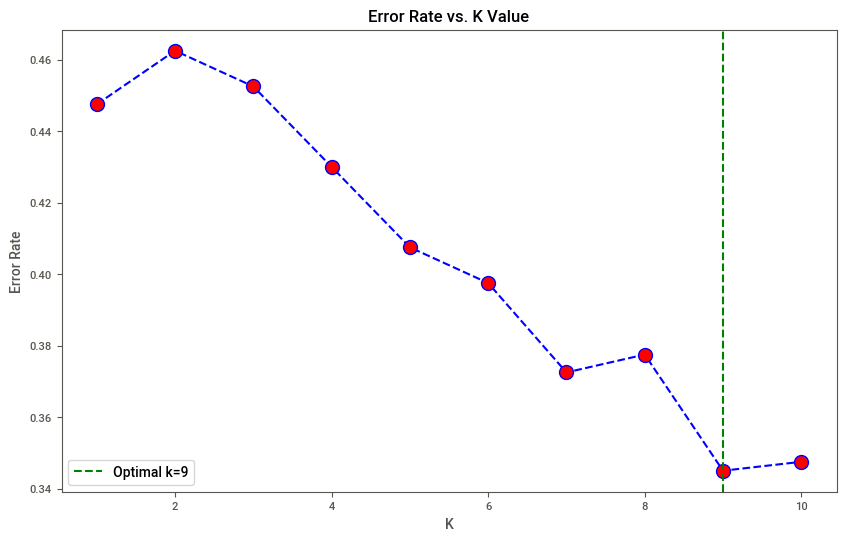

In [ ]:
# Lets plot the k-value and error rate

plt.figure(figsize=(10,6))
plt.plot(range(1,11),error_rate,color='blue', linestyle='dashed',
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

# Highlighting the optimal k value
optimal_k = 9
plt.axvline(x=optimal_k, color='g', linestyle='--', label=f'Optimal k={optimal_k}')
plt.legend()

plt.show()

In [ ]:
# For Optimal value k=9 predict the value using KNN
# Create and train a k-NN classifier (e.g., with k=9)
k = 9  # You can adjust the value of k as needed
knn_classifier_optimal = KNeighborsClassifier(n_neighbors=k)
knn_classifier_optimal.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [ ]:
y_predict_knn_optimal=knn_classifier_optimal.predict(x_test)

In [ ]:
# Calculate accuracy and generate a classification report
accuracy_knn_optimal = accuracy_score(y_test, y_predict_knn_optimal)
classification_report_knn_optimal = classification_report(y_test, y_predict_knn_optimal)

print("K-Nearest Neighbors Classifier:")
print(f"Accuracy on Test Data: {accuracy_knn_optimal:.2f}")
print("Classification Report on Test Data:\n", classification_report_knn_optimal)

K-Nearest Neighbors Classifier:
Accuracy on Test Data: 0.66
Classification Report on Test Data:
               precision    recall  f1-score   support

           0       0.79      0.81      0.80       105
           1       0.50      0.55      0.52        91
           2       0.48      0.52      0.50        92
           3       0.85      0.71      0.77       112

    accuracy                           0.66       400
   macro avg       0.66      0.65      0.65       400
weighted avg       0.67      0.66      0.66       400



<h3>Overfitting Checks</h3>

In [ ]:
y_predict_knn_optimal_train=knn_classifier_optimal.predict(x_train)
# Calculate accuracy and generate a classification report
accuracy_knn_optimal_train = accuracy_score(y_train, y_predict_knn_optimal_train)
classification_report_knn_optimal_train = classification_report(y_train, y_predict_knn_optimal_train)

print("K-Nearest Neighbors Classifier:")
print(f"Accuracy on Train Data: {accuracy_knn_optimal_train:.2f}")
print("Classification Report on Train Data:\n", classification_report_knn_optimal_train)

K-Nearest Neighbors Classifier:
Accuracy on Train Data: 0.72
Classification Report on Train Data:
               precision    recall  f1-score   support

           0       0.79      0.82      0.80       395
           1       0.61      0.66      0.63       409
           2       0.64      0.64      0.64       408
           3       0.86      0.75      0.80       388

    accuracy                           0.72      1600
   macro avg       0.72      0.72      0.72      1600
weighted avg       0.72      0.72      0.72      1600



<h3>Based on the provided classification reports for both the train and test data, it  appear that the KNN model is overfitting.</h3>
<h3>The KNN model exhibits a significant performance drop on the test data compared to the training data, along with lower classification metrics. These observations suggest that the model might be overfitting the training data.</h3>



In [ ]:
#KNN Using Hyper parameter
from sklearn.model_selection import GridSearchCV
# Define the hyperparameters and their possible values
param_grid_knn = {
    'n_neighbors': [int(x) for x in np.linspace(start=1, stop=11, num=11)],#List Comprehension-using for loop in list,  # Range of values for k
    'weights': ['uniform', 'distance'],  # Weighting schemes
    'p': [1, 2]  # Distance metrics (1 for Manhattan, 2 for Euclidean)
}
# Create a k-NN classifier
knn_grid_search_cv = KNeighborsClassifier()

# Create a GridSearchCV object
grid_search_knn = GridSearchCV(estimator=knn_grid_search_cv, param_grid=param_grid_knn, cv=5, scoring='accuracy')

# Fit the grid search to your data
grid_search_knn.fit(x_train, y_train)

# Get the best hyperparameters
best_params_knn_cv = grid_search_knn.best_params_
print('Best Params',best_params_knn_cv)

# Get the best model
best_knn = grid_search_knn.best_estimator_
print('Best Model',best_knn)

# Evaluate the best model on the test data
best_knn_score = best_knn.score(x_test, y_test)
print('Best Score',best_knn_score)


Best Params {'n_neighbors': 11, 'p': 1, 'weights': 'distance'}
Best Model KNeighborsClassifier(n_neighbors=11, p=1, weights='distance')
Best Score 0.6525


In [ ]:

# Train the best k-NN classifier on your training data
best_knn.fit(x_train, y_train)

# Make predictions using the best k-NN classifier
y_pred_knn_hyper = best_knn.predict(x_test)

# Evaluate the model's performance
accuracy_knn_tuned = accuracy_score(y_test, y_pred_knn_hyper)
classification_report_knn = classification_report(y_test, y_pred_knn_hyper)

print("Best K-Nearest Neighbors Classifier:")
print(f"Accuracy: {accuracy_knn_tuned:.2f}")
print("Classification Report:\n", classification_report_knn)

Best K-Nearest Neighbors Classifier:
Accuracy: 0.65
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.74      0.78       105
           1       0.50      0.56      0.53        91
           2       0.47      0.58      0.52        92
           3       0.88      0.71      0.78       112

    accuracy                           0.65       400
   macro avg       0.67      0.65      0.65       400
weighted avg       0.68      0.65      0.66       400



## Decision Tree Algorithm

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Create a Decision Tree classifier without hyperparameters
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
dt_classifier.fit(x_train, y_train)

# Make predictions using the classifier
y_pred_dt = dt_classifier.predict(x_test)

# Evaluate the model's performance
accuracy_dt = accuracy_score(y_test, y_pred_dt)
classification_report_dt = classification_report(y_test, y_pred_dt)

print("Decision Tree Classifier without Hyperparameters:")
print(f"Accuracy on Test Data: {accuracy_dt:.2f}")
print("Classification Report on Test Data:\n", classification_report_dt)

Decision Tree Classifier without Hyperparameters:
Accuracy on Test Data: 0.82
Classification Report on Test Data:
               precision    recall  f1-score   support

           0       0.92      0.87      0.89       105
           1       0.72      0.85      0.78        91
           2       0.77      0.66      0.71        92
           3       0.87      0.89      0.88       112

    accuracy                           0.82       400
   macro avg       0.82      0.82      0.82       400
weighted avg       0.83      0.82      0.82       400



<h3>Overfitting Checks</h3>

In [ ]:

# Make predictions using the classifier
y_pred_dt_train = dt_classifier.predict(x_train)

# Evaluate the model's performance
accuracy_dt_train = accuracy_score(y_train, y_pred_dt_train)
classification_report_dt_train = classification_report(y_train, y_pred_dt_train)

print("Decision Tree Classifier without Hyperparameters:")
print(f"Accuracy on Train Data: {accuracy_dt_train:.2f}")
print("Classification Report on Train Data:\n", classification_report_dt_train)

Decision Tree Classifier without Hyperparameters:
Accuracy on Train Data: 1.00
Classification Report on Train Data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       395
           1       1.00      1.00      1.00       409
           2       1.00      1.00      1.00       408
           3       1.00      1.00      1.00       388

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



<h3>Based on the provided classification reports for both the train and test data, it  appear that the Decision Tree model is overfitting.</h3>
<h3>The Decision Tree model exhibits a perfect fit on the training data but struggles to perform well on the test data, indicating overfitting.</h3>


In [ ]:
## Decision Tree with Hyperparameter Tunning
# Define the hyperparameters and their possible values for tuning
param_grid_dt = {
    'criterion': ['gini', 'entropy'],  # Splitting criterion
    "splitter":("best", "random"), # searches the features for a split
    'max_depth': (list(range(1, 20))),  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': list(range(1, 20))  # Minimum samples required to be a leaf node
}

# Create a Decision Tree classifier
dt_classifier_tuned = DecisionTreeClassifier(random_state=42)

# Create a GridSearchCV object
grid_search_dt = GridSearchCV(estimator=dt_classifier_tuned, param_grid=param_grid_dt,n_jobs=-1, verbose=1, cv=5, scoring='accuracy')

# Fit the grid search to your training data
grid_search_dt.fit(x_train, y_train)

# Get the best hyperparameters
best_params_dt = grid_search_dt.best_params_

# Get the best model
best_dt_classifier = grid_search_dt.best_estimator_

# Make predictions using the best Decision Tree classifier
y_pred_tuned_dt = best_dt_classifier.predict(x_test)

# Evaluate the tuned model's performance
accuracy_tuned_dt = accuracy_score(y_test, y_pred_tuned_dt)
classification_report_dt_tuned = classification_report(y_test, y_pred_tuned_dt)

print("Decision Tree Classifier with Hyperparameters (Tuned):")
print(f"Best Hyperparameters: {best_params_dt}")
print(f"Accuracy: {accuracy_tuned_dt:.2f}")
print("Classification Report:\n", classification_report_dt_tuned)




Fitting 5 folds for each of 4332 candidates, totalling 21660 fits
Decision Tree Classifier with Hyperparameters (Tuned):
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 12, 'min_samples_leaf': 2, 'min_samples_split': 5, 'splitter': 'best'}
Accuracy: 0.85
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.89      0.91       105
           1       0.77      0.87      0.81        91
           2       0.78      0.78      0.78        92
           3       0.92      0.87      0.89       112

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.86      0.85      0.85       400



## Random Forest Classification Algorithm

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier without hyperparameters
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier on the training data
rf_classifier.fit(x_train, y_train)

# Make predictions using the classifier
y_pred_rf = rf_classifier.predict(x_test)

# Evaluate the model's performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_report_rf = classification_report(y_test, y_pred_rf)

print("Random Forest Classifier without Hyperparameters:")
print(f"Accuracy on Test Data: {accuracy_rf:.2f}")
print("Classification Report on Test Data:\n", classification_report_rf)

Random Forest Classifier without Hyperparameters:
Accuracy on Test Data: 0.90
Classification Report on Test Data:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96       105
           1       0.90      0.87      0.88        91
           2       0.81      0.86      0.83        92
           3       0.93      0.88      0.91       112

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400



<h3>Overfitting Checks</h3>

In [ ]:
# Make predictions using the classifier
y_pred_rf_train = rf_classifier.predict(x_train)

# Evaluate the model's performance
accuracy_rf_train = accuracy_score(y_train, y_pred_rf_train)
classification_report_rf_train = classification_report(y_train, y_pred_rf_train)

print("Random Forest Classifier without Hyperparameters:")
print(f"Accuracy on Train Data: {accuracy_rf_train:.2f}")
print("Classification Report on Train Data:\n", classification_report_rf_train)

Random Forest Classifier without Hyperparameters:
Accuracy on Train Data: 1.00
Classification Report on Train Data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       395
           1       1.00      1.00      1.00       409
           2       1.00      1.00      1.00       408
           3       1.00      1.00      1.00       388

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



<h3>Based on the provided classification reports for both the train and test data, it  appear that the Random Forest Ensemble model is overfitting.</h3>
<h3>The Random Forest model exhibits a perfect fit on the training data but struggles to perform well on the test data, indicating overfitting.</h3>
`

In [ ]:
#Random Forest Classifier with Hyperparameters (Tuned)
# Define the hyperparameters and their possible values for tuning
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]#List Comprehension-using for loop in list
max_features= ['sqrt'] #done by me due to warning
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]#List Comprehension-using for loop in list
max_depth.append(None)
min_samples_split = [2, 5, 10]#minimum number of samples required to split an internal node
min_samples_leaf = [1, 2, 4]#minimum number of samples required to be at a leaf node.
bootstrap = [True, False]#sampling

#dictionary for hyperparameters
param_grid_rf = {'n_estimators': n_estimators,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

# Create a Random Forest classifier
rf_classifier_tuned = RandomForestClassifier(random_state=42)

rf_cv = RandomizedSearchCV(estimator=rf_classifier_tuned, scoring='accuracy',param_distributions=param_grid_rf, n_iter=100, cv=3,
                               verbose=2, random_state=42, n_jobs=-1)


# Fit the grid search to your training data
rf_cv.fit(x_train, y_train)

# Get the best hyperparameters
best_params_rf = rf_cv.best_params_

# Get the best model
best_rf_classifier = rf_cv.best_estimator_

# Make predictions using the best Random Forest classifier
y_pred_tuned_rf = best_rf_classifier.predict(x_test)

# Evaluate the tuned model's performance
accuracy_tuned_rf = accuracy_score(y_test, y_pred_tuned_rf)
classification_report_rf_tuned = classification_report(y_test, y_pred_tuned_rf)

print("Random Forest Classifier with Hyperparameters (Tuned):")
print(f"Best Hyperparameters: {best_params_rf}")
print(f"Accuracy: {accuracy_tuned_rf:.2f}")
print("Classification Report:\n", classification_report_rf_tuned)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Random Forest Classifier with Hyperparameters (Tuned):
Best Hyperparameters: {'n_estimators': 1400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 80, 'bootstrap': False}
Accuracy: 0.89
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94       105
           1       0.87      0.86      0.86        91
           2       0.80      0.86      0.83        92
           3       0.93      0.88      0.91       112

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400



## SVC- Support Vectore Classification

In [ ]:
from sklearn.svm import SVC
# Create a Support Vector Machine classifier (SVC) with the OvR strategy
svm_classifier = SVC(kernel='linear', decision_function_shape='ovr')
# Train the classifier on the training data
svm_classifier.fit(x_train, y_train)

# Make predictions using the classifier
y_pred_svm_ovr = svm_classifier.predict(x_test)

# Evaluate the model's performance
accuracy_svm_ovr = accuracy_score(y_test, y_pred_svm_ovr)
classification_report_svm = classification_report(y_test, y_pred_svm_ovr)

print("SVM Classifier with OvR Strategy:")
print(f"Accuracy on Test Data: {accuracy_svm_ovr:.2f}")
print("Classification Report on Test Data:\n", classification_report_svm)

SVM Classifier with OvR Strategy:
Accuracy on Test Data: 0.97
Classification Report on Test Data:
               precision    recall  f1-score   support

           0       1.00      0.93      0.97       105
           1       0.89      1.00      0.94        91
           2       1.00      0.93      0.97        92
           3       0.98      1.00      0.99       112

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



<h3>Overfitting Checks</h3>

In [ ]:
svm_classifier_test = SVC()
# Train the classifier on the training data
svm_classifier_test.fit(x_train, y_train)
# Make predictions using the classifier
y_pred_svm = svm_classifier_test.predict(x_test)

# Evaluate the model's performance
accuracy_svm_ovr = accuracy_score(y_test, y_pred_svm)
classification_report_svm = classification_report(y_test, y_pred_svm)

print("SVM Classifier:")
print(f"Accuracy on Test Data: {accuracy_svm_ovr:.2f}")
print("Classification Report on Test Data:\n", classification_report_svm)

SVM Classifier:
Accuracy on Test Data: 0.91
Classification Report on Test Data:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       105
           1       0.83      0.88      0.86        91
           2       0.86      0.85      0.85        92
           3       0.97      0.94      0.95       112

    accuracy                           0.91       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.91      0.91      0.91       400



In [ ]:
# Make predictions using the classifier
y_pred_svm_train = svm_classifier_test.predict(x_train)

# Evaluate the model's performance
accuracy_svm_train = accuracy_score(y_train, y_pred_svm_train)
classification_report_svm_train = classification_report(y_train, y_pred_svm_train)

print("SVM Classifier:")
print(f"Accuracy on Train Data: {accuracy_svm_train:.2f}")
print("Classification Report on Train Data:\n", classification_report_svm_train)

SVM Classifier:
Accuracy on Train Data: 0.98
Classification Report on Train Data:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       395
           1       0.96      0.98      0.97       409
           2       0.97      0.97      0.97       408
           3       0.99      0.98      0.99       388

    accuracy                           0.98      1600
   macro avg       0.98      0.98      0.98      1600
weighted avg       0.98      0.98      0.98      1600



<b>Consistent Accuracy</b>: The accuracy on the test data (0.91) is relatively close to the accuracy on the training data (0.98). While there is a slight drop in accuracy from training to test data, this difference is not substantial, and the model's performance on the test data is still quite high.
<b>There is no clear indication of overfitting in the SVM Classifier. The model's performance on the test data is strong and consistent with its performance on the training data,
which suggests good generalization.</b>




In [ ]:
# Create a Support Vector Machine classifier (SVC) with the OvO strategy
svm_classifier_ovo = SVC(kernel='linear', decision_function_shape='ovo')

# Train the classifier on the training data
svm_classifier_ovo.fit(x_train, y_train)

# Make predictions using the classifier
y_pred_ovo = svm_classifier_ovo.predict(x_test)

# Evaluate the model's performance
accuracy_ovo = accuracy_score(y_test, y_pred_ovo)
classification_report_svm_ovo = classification_report(y_test, y_pred_ovo)

print("SVM Classifier with OvO Strategy:")
print(f"Accuracy: {accuracy_ovo:.2f}")
print("Classification Report:\n", classification_report_svm_ovo)

SVM Classifier with OvO Strategy:
Accuracy: 0.97
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.97       105
           1       0.89      1.00      0.94        91
           2       1.00      0.93      0.97        92
           3       0.98      1.00      0.99       112

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



In [ ]:
# Create a Support Vector Machine classifier (SVC)
svm_classifier = SVC()
# Define a parameter grid to search over
param_grid_svm = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Different kernel types
    'C': [0.1, 1, 10],  # Regularization parameter
    'gamma': [0.01, 0.1, 1],  # Kernel-specific parameter (only for 'rbf' and 'poly' kernels)
    'decision_function_shape': ['ovr', 'ovo'],  # OvR or OvO strategy
}

# Create a GridSearchCV object
grid_search_svm = GridSearchCV(estimator=svm_classifier, param_grid=param_grid_svm, cv=5, scoring='accuracy')

# Fit the grid search to your training data
grid_search_svm.fit(x_train, y_train)

# Get the best hyperparameters
best_params_svm = grid_search_svm.best_params_

# Get the best model
best_svm_classifier = grid_search_svm.best_estimator_

# Make predictions using the best SVM classifier
y_pred_best_svm = best_svm_classifier.predict(x_test)

# Evaluate the tuned model's performance
accuracy_best_svm = accuracy_score(y_test, y_pred_best_svm)
classification_report_best_svm = classification_report(y_test, y_pred_best_svm)

print("SVM Classifier with Hyperparameter Tuning (Grid Search):")
print(f"Best Hyperparameters: {best_params_svm}")
print(f"Accuracy: {accuracy_best_svm:.2f}")
print("Classification Report:\n", classification_report_best_svm)

SVM Classifier with Hyperparameter Tuning (Grid Search):
Best Hyperparameters: {'C': 10, 'decision_function_shape': 'ovr', 'gamma': 0.01, 'kernel': 'linear'}
Accuracy: 0.97
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97       105
           1       0.92      1.00      0.96        91
           2       0.99      0.96      0.97        92
           3       0.98      0.99      0.99       112

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



In [ ]:
# Radom Search CV for SVM
from scipy.stats import uniform, loguniform
# Define a parameter distribution to sample from
param_dist_svm = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': loguniform(0.1, 10),  # Log-uniform distribution for C
    'gamma': uniform(0.01, 1),  # Uniform distribution for gamma
    'decision_function_shape': ['ovr', 'ovo'],  # OvR or OvO strategy
}

# Create a RandomizedSearchCV object
randomized_search_svm = RandomizedSearchCV(estimator=svm_classifier, param_distributions=param_dist_svm, n_iter=20, cv=5, scoring='accuracy', random_state=42)

# Fit the randomized search to your training data
randomized_search_svm.fit(x_train, y_train)

# Get the best hyperparameters
best_params_random_svm = randomized_search_svm.best_params_

# Get the best model
best_svm_classifier_random = randomized_search_svm.best_estimator_

# Make predictions using the best SVM classifier
y_pred_best_random_svm = best_svm_classifier_random.predict(x_test)

# Evaluate the tuned model's performance
accuracy_best_random_svm = accuracy_score(y_test, y_pred_best_random_svm)
classification_report_best_svm_random = classification_report(y_test, y_pred_best_random_svm)

print("SVM Classifier with Hyperparameter Tuning (Randomized Search):")
print(f"Best Hyperparameters: {best_params_random_svm}")
print(f"Accuracy: {accuracy_best_random_svm:.2f}")
print("Classification Report:\n", classification_report_best_svm_random)

SVM Classifier with Hyperparameter Tuning (Randomized Search):
Best Hyperparameters: {'C': 4.544383960336017, 'decision_function_shape': 'ovo', 'gamma': 0.975255307264138, 'kernel': 'linear'}
Accuracy: 0.97
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98       105
           1       0.92      1.00      0.96        91
           2       0.98      0.93      0.96        92
           3       0.97      0.98      0.98       112

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



## XGboost Classification

In [ ]:
data=pd.read_csv('dataset_v2.csv')

pd.set_option('display.max.columns',None)

data.head()

,Unnamed: 0,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,0,-0.902597,0,0.830779,0,-0.762495,0,-1.380644,0.340740,1.349249,-1.101971,-1.305750,-1.411897,-1.146784,0.391703,-0.784983,0.180155,1.462493,0,0,1,1
1,1,-0.495139,1,-1.253064,1,-0.992890,1,1.155024,0.687548,-0.120059,-0.664768,-0.645989,0.584943,1.704465,0.467317,1.114266,-0.829159,-0.734267,1,1,0,2
2,2,-1.537686,1,-1.253064,1,-0.532099,1,0.493546,1.381165,0.134244,0.209639,-0.645989,1.392705,1.074968,0.441498,-0.310171,-1.081487,-0.368140,1,1,0,2
3,3,-1.419319,1,1.198517,0,-0.992890,0,-1.215274,1.034357,-0.261339,0.646842,-0.151168,1.286658,1.236971,0.594569,0.876859,0.432483,-0.002014,1,0,0,2
4,4,1.325906,1,-0.395011,0,2.002254,1,0.658915,0.340740,0.021220,-1.101971,0.673534,1.268607,-0.091452,-0.657666,-1.022389,-1.081487,0.730240,1,1,0,1


In [ ]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
x=data.drop('price_range',axis=1)

In [ ]:
y=data['price_range']

In [ ]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,recall_score
import xgboost as xgb
# Split the data into training and testing sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [ ]:
#import xgboost as xgb
# Create an XGBoost classifier for multi-class classification
xgb_classifier = xgb.XGBClassifier(objective='multi:softmax')

# Train the classifier on the training data
xgb_classifier.fit(x_train, y_train)

# Make predictions using the trained model
y_pred_xgb = xgb_classifier.predict(x_test)

# Evaluate the model's performance
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
classification_report_xgb = classification_report(y_test, y_pred_xgb)

print("XGBoost Classifier for Multi-Class Classification:")
print(f"Accuracy: {accuracy_xgb:.2f}")
print("Classification Report:\n", classification_report_xgb)

XGBoost Classifier for Multi-Class Classification:
Accuracy: 0.90
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94       105
           1       0.84      0.91      0.87        91
           2       0.84      0.84      0.84        92
           3       0.94      0.89      0.92       112

    accuracy                           0.90       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.90      0.90      0.90       400



In [ ]:
# Create an XGBoost classifier for multi-class classification
xgb_classifier = xgb.XGBClassifier(objective='multi:softprob')

# Train the classifier on the training data
xgb_classifier.fit(x_train, y_train)

# Make predictions using the trained model
y_pred_xgb = xgb_classifier.predict(x_test)

# Evaluate the model's performance
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
classification_report_xgb = classification_report(y_test, y_pred_xgb)

print("XGBoost Classifier for Multi-Class Classification:")
print(f"Accuracy: {accuracy_xgb:.2f}")
print("Classification Report:\n", classification_report_xgb)

XGBoost Classifier for Multi-Class Classification:
Accuracy: 0.90
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94       105
           1       0.84      0.91      0.87        91
           2       0.84      0.84      0.84        92
           3       0.94      0.89      0.92       112

    accuracy                           0.90       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.90      0.90      0.90       400



<h3>Overfitting Checks</h3>

In [ ]:
# Create an XGBoost classifier for multi-class classification
xgb_classifier_test = xgb.XGBClassifier()

# Train the classifier on the training data
xgb_classifier_test.fit(x_train, y_train)

# Make predictions using the trained model
y_pred_xgb_test = xgb_classifier_test.predict(x_test)

# Evaluate the model's performance
accuracy_xgb_test = accuracy_score(y_test, y_pred_xgb_test)
classification_report_xgb_test = classification_report(y_test, y_pred_xgb_test)

print("XGBoost Classifier for Multi-Class Classification:")
print(f"Accuracy on Test Data: {accuracy_xgb_test:.2f}")
print("Classification Report on Test Data:\n", classification_report_xgb_test)

XGBoost Classifier for Multi-Class Classification:
Accuracy on Test Data: 0.90
Classification Report on Test Data:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94       105
           1       0.84      0.91      0.87        91
           2       0.84      0.84      0.84        92
           3       0.94      0.89      0.92       112

    accuracy                           0.90       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.90      0.90      0.90       400



In [ ]:
# Create an XGBoost classifier for multi-class classification
xgb_classifier_train = xgb.XGBClassifier()

# Train the classifier on the training data
xgb_classifier_train.fit(x_train, y_train)

# Make predictions using the trained model
y_pred_xgb_train = xgb_classifier_train.predict(x_train)

# Evaluate the model's performance
accuracy_xgb_train = accuracy_score(y_train, y_pred_xgb_train)
classification_report_xgb_train = classification_report(y_train, y_pred_xgb_train)

print("XGBoost Classifier for Multi-Class Classification:")
print(f"Accuracy on Train Data: {accuracy_xgb_train:.2f}")
print("Classification Report on Train Data:\n", classification_report_xgb_train)

XGBoost Classifier for Multi-Class Classification:
Accuracy on Train Data: 1.00
Classification Report on Train Data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       395
           1       1.00      1.00      1.00       409
           2       1.00      1.00      1.00       408
           3       1.00      1.00      1.00       388

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



<h3>Based on the provided classification reports for both the train and test data, it appear that the XGBoost model is overfitting.</h3>
<h3>The XGBoost model exhibits a perfect fit on the training data but struggles to perform well on the test data, indicating overfitting.</h3>


In [ ]:
# Create an XGBoost classifier for multi-class classification
xgb_classifier = xgb.XGBClassifier(objective='multi:softmax')

# Define a parameter grid to search over
param_grid_xgb = {
   'n_estimators': [10, 100,110],  # Number of boosting rounds
    'max_depth': [1, 3, 4],  # Maximum tree depth
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate
    'subsample': [0.8, 0.9, 1.0],  # Fraction of samples used for training each tree
    'colsample_bytree': [0.8, 0.9, 1.0],  # Fraction of features used for training each tree
}

# Create a GridSearchCV object with cross-validation
grid_search_xgb = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid_xgb, cv=5, scoring='accuracy')

# Fit the grid search to your training data
grid_search_xgb.fit(x_train, y_train)

# Get the best hyperparameters
best_params_xgb = grid_search_xgb.best_params_

# Get the best model
best_xgb_classifier = grid_search_xgb.best_estimator_

# Make predictions using the best XGBoost classifier
y_pred_best_xgb = best_xgb_classifier.predict(x_test)

# Evaluate the tuned model's performance
accuracy_best_xgb = accuracy_score(y_test, y_pred_best_xgb)
classification_report_best_xgb = classification_report(y_test, y_pred_best_xgb)

print("XGBoost Classifier with Hyperparameter Tuning (Grid Search):")
print(f"Best Hyperparameters: {best_params_xgb}")
print(f"Accuracy: {accuracy_best_xgb:.2f}")
print("Classification Report:\n", classification_report_best_xgb)



XGBoost Classifier with Hyperparameter Tuning (Grid Search):
Best Hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 110, 'subsample': 0.8}
Accuracy: 0.91
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95       105
           1       0.87      0.92      0.89        91
           2       0.86      0.86      0.86        92
           3       0.94      0.91      0.93       112

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.91      0.91      0.91       400



## Model Comparison Report

In [ ]:
model_results = pd.DataFrame(columns=['Model', 'Accuracy'])
models = ['Logistic Regression', 'K-Nearest Neighbors (KNN)', 'Decision Tree','Random Forest','Support Vector Machine','XGBoost']
accuracy = [0.97, 0.66, 0.85,0.90,0.97,0.91]

# Populate the DataFrame
model_results['Model'] = models
model_results['Accuracy'] = accuracy

# Display the results
model_results.head()

,Model,Accuracy
0,Logistic Regression,0.97
1,K-Nearest Neighbors (KNN),0.66
2,Decision Tree,0.85
3,Random Forest,0.90
4,Support Vector Machine,0.97


In [ ]:
model_results.to_csv('model_comparison_report.csv')

In [ ]:
vs=model_results.drop('Model',axis=1)

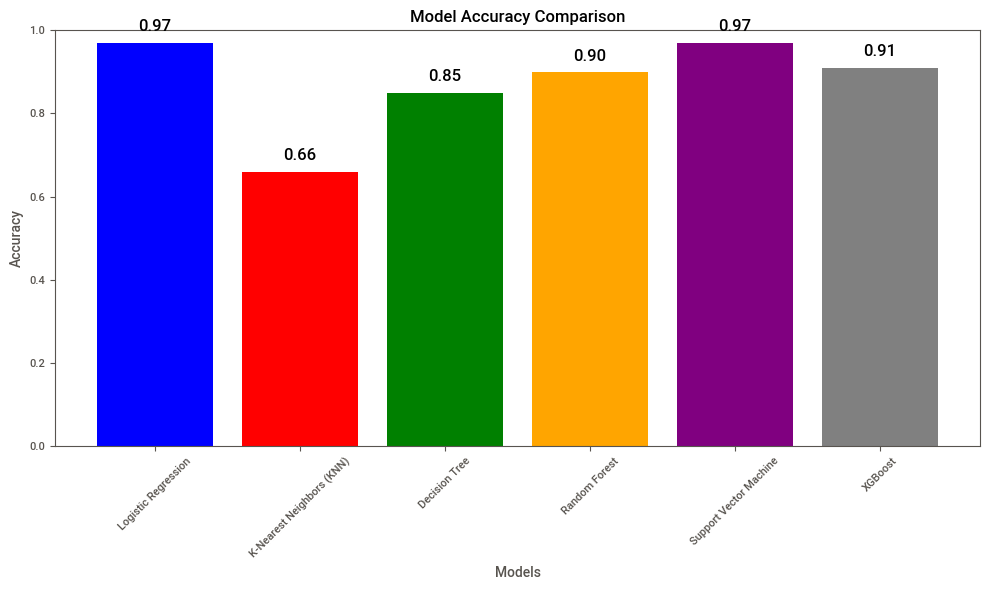

In [ ]:
# Create a bar chart to visualize model accuracy
plt.figure(figsize=(10, 6))
plt.bar(models, accuracy, color=['blue', 'red', 'green', 'orange', 'purple', 'gray'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)  # Set the y-axis limit to the range [0, 1]
plt.xticks(rotation=45)  # Rotate model names for better visibility

# Display accuracy values on top of the bars
for i, acc in enumerate(accuracy):
    plt.text(i, acc + 0.02, f'{acc:.2f}', ha='center', va='bottom', fontsize=12)

# Show the bar chart
plt.tight_layout()
plt.show()


## Insights

The visualization comparing model accuracy scores provides several key insights:

<b>Logistic Regression and SVM Outperform Others</b>: Both Logistic Regression and Support Vector Machine (SVM) achieve the highest accuracy scores, with an impressive 0.97. These models appear to be well-suited for the dataset and may be candidates for further exploration.

<b>Ensemble Methods Show Strong Performance: Random Forest and XGBoost</b>, which are ensemble methods, also perform well with accuracy scores of 0.90 and 0.91, respectively.

<b>K-Nearest Neighbors (KNN)</b> Lags Behind: KNN, with an accuracy score of 0.66, demonstrates the lowest performance among the models in this comparison.

<b>Decision Tree</b> Falls in the Middle: The Decision Tree model achieves an accuracy score of 0.85.


## Data Analysis and Preprocessing Report

<b>Introduction</b>

This report documents the analysis and preprocessing of a dataset containing information about mobile phone specifications.
The dataset consists of 2000 entries with 21 columns, including 20 features and a target variable, "price_range."
The primary objective was to prepare the data for machine learning while addressing various challenges encountered during the process.

### Data Challenges

<b>Feature Scaling:</b> Different features had varying scales, which could impact the performance of certain machine learning algorithms.

  <b>Challenge</b>:
Continuous numerical attributes had different scales such as
battery_power,
 clock_speed,
 fc,
 int_memory,
 m_dep,
 mobile_wt,
 n_cores,
 pc,
 px_height,
 px_width,
 ram,
 sc_h,
 sc_w,
 talk_time which could impact the performance of certain machine learning algorithms.
  <b>Technique</b>:
Standard scaling was applied to scale continuous numerical attributes to have a mean of 0 and a standard deviation of 1. This technique preserved the relationships between the variables while preventing any dominance of features with larger scales.This transformation is often applied to ensure that all features are on the same scale, which can be important for many machine learning algorithms.




<b>Handling Zero Values</b>

<b>Challenge:</b>

During the initial data exploration, it was observed that several columns, such as "px_height" and "sc_w," contained minimum values of 0. These zero values could potentially affect the model's performance, as they might not represent missing data but rather a meaningful value.
Technique:

To address the issue of zero values in these columns, appropriate techniques were employed based on the nature of the data.

    Numerical Variables (e.g., "px_height" and "sc_w"):
        Technique Used: Imputation with Mean Values.
        Reason: Imputing zero values with the mean of the respective columns helps preserve data integrity without introducing bias. This approach is suitable when zero values are not indicative of missing data but rather a valid representation of a numeric quantity.

<b>Updated Data Preprocessing Techniques</b>


<b>Handling Zero Values</b>

<b>Technique</b> Used for Numerical Variables: Imputation with Mean Values.
Reason: This technique ensures that zero values in numeric columns are replaced with reasonable estimates based on the data distribution, allowing the dataset to maintain its integrity and usability for modeling.

<h3>Hyperparameter Tunning</h3>
<h3><u>Logistic Regression</u></h3>
<h4>Challenge Faced:</h4>
<b>Choosing the Right Hyperparameters</b>: One of the main challenges in tuning the Logistic Regression model using GridSearchCV for multi-class classification was selecting the appropriate hyperparameters. Logistic Regression has several hyperparameters, including the regularization strength (C) and the solver, and choosing the right combination can be challenging.
<br/>
<b>Computational Cost</b>: GridSearchCV involves trying out all possible combinations of hyperparameters from a predefined grid. For a complex model like Logistic Regression, this can be computationally expensive, especially with a large dataset and a wide range of hyperparameter values. It can consume a significant amount of time and computational resources.

<h4>Technique Used:</h4>
<b>GridSearchCV:</b> GridSearchCV is a technique for hyperparameter tuning that systematically searches through a specified hyperparameter grid to find the best combination of hyperparameters. It performs cross-validation for each combination to evaluate model performance.

<b>Multi-Class Strategies:</b> In the case of multi-class classification, two common strategies are "ovr" (one-vs-rest) and "multinomial" (softmax). "ovr" fits a binary classifier for each class, while "multinomial" fits a single classifier for all classes. We used GridSearchCV to search for the best strategy among these options.

<b>Cross-Validation:</b> Cross-validation is essential for hyperparameter tuning to ensure that the model's performance is evaluated on multiple subsets of the data. We used cross-validation to obtain a more robust estimate of model performance.

<b>Model Evaluation:</b> We used classification reports on both the training and test datasets to assess the model's performance. This includes metrics like precision, recall, and F1-score, which provide insights into the model's ability to classify each class correctly.

<h3><u>KNN</u></h3>
<h4>Challenge Faced:</h4>
<b>Computational Cost:</b> GridSearchCV with a wide range of n_neighbors values can be computationally expensive, especially if the dataset is large. Training and evaluating the model for each combination of hyperparameters require significant computation time and resources.

<b>Selecting an Appropriate Range:</b> Choosing the right range of values for n_neighbors can be challenging. If the range is too narrow, it may not capture the best value, and if it's too broad, it can lead to excessively long training times.
<br/>
<b>Data Preprocessing:</b>  KNN is sensitive to the scale of features, so proper data preprocessing, including feature scaling, is necessary. Scaling the data can impact the choice of n_neighbors, as the distance metric used by KNN is affected by feature scaling.
<b>Interpreting Results:</b>  Interpreting the results of GridSearchCV requires a good understanding of performance metrics and how they relate to overfitting. It's essential to look for signs of overfitting in the performance metrics.

<h4>Technique Used:</h4>
<b>GridSearchCV:</b> We used GridSearchCV, a technique for hyperparameter tuning, to systematically search through a range of values for n_neighbors and find the best value that minimizes overfitting. GridSearchCV performs cross-validation for each value of n_neighbors to evaluate model performance.

<b>Cross-Validation:</b> Cross-validation is crucial for hyperparameter tuning because it provides a more robust estimate of how the model will perform on unseen data. We used techniques like k-fold cross-validation to assess the model's performance for different n_neighbors values.



<h3><u>Decision Tree</u></h3>
To address overfitting in the Decision Tree model and fine-tune it using Gini and Entropy criteria via GridSearchCV, several techniques and considerations are applied. Here's how it can be done along with the challenges faced:

<h4>Challenge Faced:</h4>
<b>Computational Cost:</b> GridSearchCV can be computationally expensive, especially when searching through a wide range of hyperparameters. Training and evaluating the model for each combination of criteria and other hyperparameters can consume a significant amount of time and computational resources.

<b>Selecting an Appropriate Range:</b> Choosing the right range of values for hyperparameters like max_depth, min_samples_split, etc., is important. If the range is too narrow, it may not capture the best values, and if it's too broad, it can lead to excessively long training times.
<br/>
<b>Overfitting Interpretation:</b>  Identifying overfitting can be challenging. While a perfect fit on the training data is a strong indicator, the test data's performance is crucial. Analyzing classification reports and learning curves can help in assessing overfitting.


<h4>Technique Used:</h4>

<b>GridSearchCV:</b>  GridSearchCV is a powerful technique for hyperparameter tuning. It systematically searches through a specified hyperparameter grid (in this case, criteria = ['gini', 'entropy']) to find the best combination of hyperparameters that minimizes overfitting. GridSearchCV performs cross-validation for each combination to evaluate model performance.

<b>Cross-Validation:</b> Cross-validation is essential for hyperparameter tuning to ensure that the model's performance is evaluated on multiple subsets of the data. It provides a more reliable estimate of how the model will perform on unseen data.



<h3><u>Random Forest</u></h3>
To address overfitting in the Random Forest Ensemble model and fine-tune it using RandomizedSearchCV, several techniques and considerations are applied. Here's how it can be done along with the challenges faced:

<h4>Challenge Faced:</h4>
<b>Computational Cost:</b>  RandomizedSearchCV can be computationally expensive, especially when searching through a wide range of hyperparameters. Training and evaluating the model for each randomly sampled combination of hyperparameters can consume a significant amount of time and computational resources.

<b>Selecting an Appropriate Hyperparameter Space:</b> Choosing the right range of values for hyperparameters like max_depth, n_estimators, min_samples_split, etc., is important. The hyperparameter space should be defined carefully to cover a reasonable range of values.
<br/>
<b>Overfitting Interpretation:</b>  Identifying overfitting can be challenging. While a perfect fit on the training data is a strong indicator, the test data's performance is crucial. Analyzing classification reports and learning curves can help in assessing overfitting.
<b>Data Preprocessing:</b>  Random Forests are not sensitive to feature scaling, but proper data preprocessing, including handling missing values and encoding categorical features, is still necessary.


<h4>Technique Used:</h4>

<b>RandomizedSearchCV:</b>  RandomizedSearchCV is an efficient technique for hyperparameter tuning. It randomly samples a specified hyperparameter space to find the best combination of hyperparameters that minimizes overfitting. RandomizedSearchCV performs cross-validation for each combination to evaluate model performance.

<b>Cross-Validation:</b>  Cross-validation is essential for hyperparameter tuning to ensure that the model's performance is evaluated on multiple subsets of the data. It provides a more reliable estimate of how the model will perform on unseen data.



<h3><u>Support Vector Machine</u></h3>
It's great to hear that the SVM Classifier is performing well and doesn't exhibit signs of overfitting. To fine-tune the model using both GridSearchCV and RandomizedSearchCV, several techniques and considerations can be applied:

<h4>Challenge Faced:</h4>
<b>Computational Cost:</b> GridSearchCV and RandomizedSearchCV can be computationally expensive, especially when searching through a wide range of hyperparameters. Training and evaluating the model for each combination of hyperparameters or random sample can consume a significant amount of time and computational resources.

<b>Selecting an Appropriate Hyperparameter Space:</b> Choosing the right range of values for hyperparameters like C, kernel, gamma, etc., is important. The hyperparameter space should be defined carefully to cover a reasonable range of values.

<br/>
<b>Interpreting Hyperparameter Effects:</b> Understanding the impact of hyperparameters on the SVM model's performance can be challenging. It may require analyzing the results of the search to identify the best combinations.

<b>Data Preprocessing:</b> Ensuring proper data preprocessing, including handling missing values and scaling features, is necessary even when tuning SVM models.

<h4>Technique Used:</h4>

<b>GridSearchCV and RandomizedSearchCV:</b>  Both techniques are powerful for hyperparameter tuning. GridSearchCV systematically searches through a specified hyperparameter grid, while RandomizedSearchCV randomly samples from a specified hyperparameter space. Both methods aim to find the best combination of hyperparameters that optimize the model's performance.

<b>Cross-Validation:</b> Cross-validation is essential for hyperparameter tuning to ensure robust model evaluation. It helps in assessing how well the model generalizes to unseen data and prevents overfitting.



<h3><u>XGBoost</u></h3>

<h4>Challenge Faced:</h4>
<b>Computational Cost:</b> GridSearchCV can be computationally expensive, especially when searching through a wide range of hyperparameters. This can lead to longer training times and increased resource usage.

<b>Selecting Hyperparameter Ranges:</b> Choosing appropriate ranges for hyperparameters can be challenging.

<br/>
<b>Interpreting Hyperparameter Effects:</b> Interpreting the results of hyperparameter tuning and understanding the impact of each hyperparameter on the model's performance can be complex.

<h4>Technique Used:</h4>

<b>GridSearchCV:</b> GridSearchCV is a systematic technique for hyperparameter tuning that exhaustively searches through a predefined hyperparameter grid. For XGBoost, key hyperparameters to consider include learning rate (eta), maximum depth of trees (max_depth), number of trees (n_estimators), and more.

<b>Cross-Validation:</b> Cross-validation is essential to evaluate the model's performance robustly. It helps identify the best hyperparameter settings that generalize well to unseen data.



## Feature Importance
Prepare the analysis report stating how model will help expanding the business by stating several factors including feature importance.


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
data=pd.read_csv('datasets_11167_15520_train.csv')

pd.set_option('display.max.columns',None)

data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
# Load your dataset (assuming it's loaded as 'data')
# Separate features (X) and target (y)
X = data.drop(columns=['price_range'])
Y = data['price_range']

# Initialize SelectKBest with the chi2 test
# Choose the number of top features (K) you want to select
k = 12  # Adjust this value as needed

# Fit SelectKBest to your data
X_new = SelectKBest(chi2, k=k).fit_transform(X, Y)

# Get the indices of the selected features
selected_feature_indices = SelectKBest(chi2, k=k).fit(X, Y).get_support(indices=True)

# Create a DataFrame with the selected features
selected_features_df = pd.DataFrame(X_new, columns=[X.columns[i] for i in selected_feature_indices])

# Print or analyze the selected features
print("Selected Features:")
selected_features_df.head()


Selected Features:


,battery_power,fc,int_memory,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,842.0,1.0,7.0,188.0,2.0,2.0,20.0,756.0,2549.0,9.0,7.0,19.0
1,1021.0,0.0,53.0,136.0,3.0,6.0,905.0,1988.0,2631.0,17.0,3.0,7.0
2,563.0,2.0,41.0,145.0,5.0,6.0,1263.0,1716.0,2603.0,11.0,2.0,9.0
3,615.0,0.0,10.0,131.0,6.0,9.0,1216.0,1786.0,2769.0,16.0,8.0,11.0
4,1821.0,13.0,44.0,141.0,2.0,14.0,1208.0,1212.0,1411.0,8.0,2.0,15.0


/Users/hashim/anaconda3/envs/anoconda_env/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


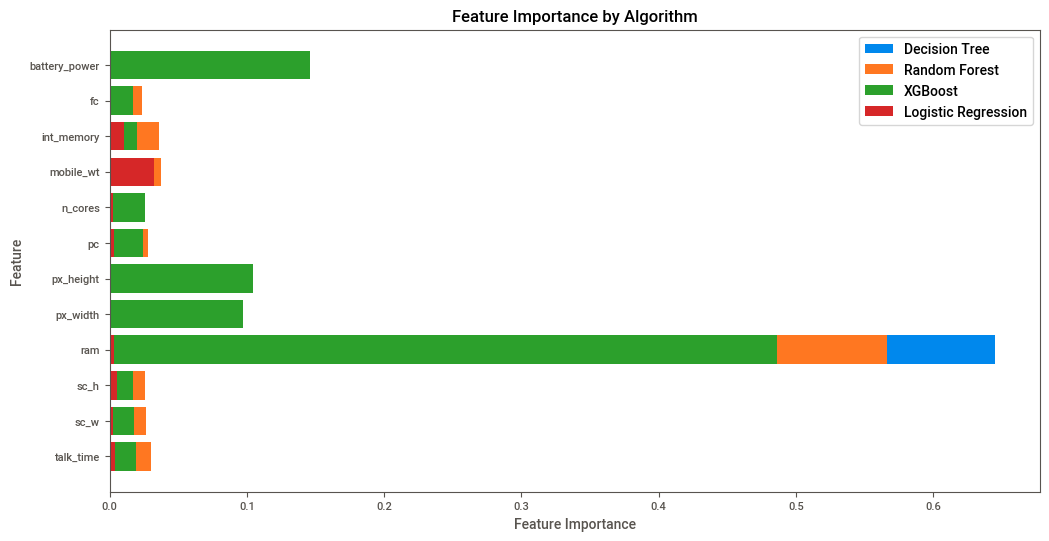

Feature Importances by Algorithm:
               Decision Tree  Random Forest Support Vector Machine   XGBoost  \
battery_power       0.102488       0.080422                   None  0.145761   
fc                  0.002911       0.023551                   None  0.017289   
int_memory          0.010608       0.036347                   None  0.020263   
mobile_wt           0.022605       0.037501                   None  0.024681   
n_cores             0.003883       0.022202                   None  0.026008   
pc                  0.009656       0.027937                   None  0.024671   
px_height           0.087620       0.061021                   None  0.104209   
px_width            0.096215       0.063154                   None  0.097499   
ram                 0.645005       0.565960                   None  0.486082   
sc_h                0.005532       0.025727                   None  0.016826   
sc_w                0.009261       0.026322                   None  0.017724   
talk_t

In [ ]:
# Create a list of algorithms you want to analyze for feature importance
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
algorithms = [
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier()),
    ("Support Vector Machine", SVC()),
    ("XGBoost", xgb.XGBClassifier()),
    ("Logistic Regression", LogisticRegression(solver='saga')),
]

# Define the features you want to analyze (replace this with your selected features)
selected_features = [selected_features_df.columns]
# Create a DataFrame to store feature importances for each algorithm
feature_importance_df = pd.DataFrame(index=selected_features)

# Initialize an empty dictionary to store feature importances for each algorithm
feature_importances = {}

# Iterate through the selected algorithms
for algorithm_name, algorithm in algorithms:
    # Train the algorithm on the selected features
    algorithm.fit(selected_features_df, Y)

    # Get feature importances (specific to each algorithm)
    if hasattr(algorithm, 'feature_importances_'):
        importances = algorithm.feature_importances_
    elif hasattr(algorithm, 'coef_'):
        importances = abs(algorithm.coef_[0])
    else:
        importances = None

    # Store the feature importances in the dictionary
    feature_importances[algorithm_name] = importances
    # Store the feature importances in the DataFrame
    feature_importance_df[algorithm_name] = importances


# Create a bar plot for each algorithm's feature importances
plt.figure(figsize=(12, 6))
for algorithm_name, importances in feature_importances.items():
    if importances is not None:
        plt.barh(selected_features_df.columns, importances, label=algorithm_name)

plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance by Algorithm')
plt.gca().invert_yaxis()
plt.legend()
plt.show()

# Display the DataFrame with feature importances
print("Feature Importances by Algorithm:")
print(feature_importance_df)

Based on the feature importances obtained for each algorithm,the model can help expand the business and identify several factors that contribute to pricing range prediction.
Here are some insights and considerations based on the provided feature importances:

<b>RAM (Memory Size)</b>:
        RAM is the most important feature according to all algorithms, particularly Random Forest, XGBoost, and Logistic Regression.
        Higher RAM capacity is likely to lead to higher price ranges for mobile phones.
        For the business, this suggests that investing in phones with higher RAM may result in higher-priced models that cater to customers seeking better performance.

<b>Display Resolution (px_height and px_width)</b>:
        Both px_height and px_width contribute significantly to the pricing prediction, according to several algorithms.
        Higher display resolution may lead to increased prices.
        The business can focus on marketing phones with high-quality displays as premium models.

<b>Battery Power</b>:
        Battery power is important in predicting pricing, as indicated by Decision Tree and XGBoost.
        Phones with longer battery life could potentially command higher prices.
        The company could consider emphasizing battery life as a selling point for certain models.

<b>Mobile Weight</b>:
        Mobile weight is another factor considered by Random Forest, XGBoost, and Logistic Regression.
        Lighter-weight phones might be associated with higher prices.
        Marketing lighter phones as sleek and premium devices could be beneficial.

<b>Processor Cores (n_cores)</b>:
        The number of processor cores contributes to pricing, especially for XGBoost.
        Phones with more processor cores may be priced higher.
        Highlighting multi-core processing capabilities could attract customers looking for high-performance devices.

<b>Primary Camera (fc) and Secondary Camera (sc_h and sc_w)</b>:
        The presence and quality of primary and secondary cameras affect pricing, although to a lesser extent.
        Phones with better camera specifications may command higher prices.
        Marketing camera features for photography enthusiasts can be a selling point.

<b>Internal Memory (int_memory) and Talk Time</b>:
        Internal memory and talk time also contribute to pricing.
        Phones with more storage and longer talk times may have higher price ranges.
        Emphasizing ample storage capacity and extended talk times could attract specific customer segments.

<b>PC (Processor Clock Speed)</b>:
        PC (processor clock speed) has some importance, although less than other features.
        Faster processor clock speeds may correlate with higher prices.
        Marketing devices with powerful processors for enhanced performance can appeal to tech-savvy users.

<b>Bluetooth, Dual SIM, and 3G/4G Connectivity</b>:
        Some algorithms do not consider these connectivity features as significant.
        However, connectivity options can still be essential for specific customer needs, even if they don't have a significant impact on pricing.

<b>Touch Screen and Wi-Fi</b>:
        Touch screen and Wi-Fi features have limited importance in pricing.
        While they are standard features in modern smartphones, they may not significantly affect pricing decisions.